In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

pd.set_option('max_columns', None)
pd.set_option('max_colwidth', None)

In [3]:
df = pd.read_csv('training_.csv')
test = pd.read_csv('test.csv')

In [4]:
df.head()

,S.No,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,1,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,3,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,4,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,5,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [5]:
desc = {
    'Column': [
        'Timestamp',
        'Age',
        'Gender',
        'Country',
        'state',
        'self_employed',
        'family_history',
        'treatment',
        'work_interfere',
        'no_employees',
        'remote_work',
        'tech_company',
        'benefits',
        'care_options',
        'wellness_program',
        'seek_help',
        'anonymity',
        'leave',
        'mental_health_consequence',
        'phys_health_consequence',
        'coworkers',
        'supervisor',
        'mental_health_interview',
        'phys_health_interview',
        'mental_vs_physical',
        'obs_consequence',
        'comments'
    ],
    'Description': [
        'Timestamp',
        'Age',
        'Gender',
        'Country',
        'If you live in the United States, which state or territory do you live in?',
        'Are you self-employed?',
        'Do you have a family history of mental illness?',
        'Does he or she really needs treatment.',
        'If you have a mental health condition, do you feel that it interferes with your work?',
        'How many employees does your company or organization have?',
        'Do you work remotely (outside of an office) at least 50% of the time?',
        'Is your employer primarily a tech company/organization?',
        'Does your employer provide mental health benefits?',
        'Do you know the options for mental health care your employer provides?',
        'Has your employer ever discussed mental health as part of an employee wellness program?',
        'Does your employer provide resources to learn more about mental health issues and how to seek help?',
        'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?',
        'How easy is it for you to take medical leave for a mental health condition?',
        'Do you think that discussing a mental health issue with your employer would have negative consequences?',
        'Do you think that discussing a physical health issue with your employer would have negative consequences?',
        'Would you be willing to discuss a mental health issue with your coworkers?',
        'Would you be willing to discuss a mental health issue with your direct supervisor(s)?',
        'Would you bring up a mental health issue with a potential employer in an interview?',
        'Would you bring up a physical health issue with a potential employer in an interview?',
        'Do you feel that your employer takes mental health as seriously as physical health?',
        'Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?',
        'Any additional notes or comments.'
    ]
}
desc = pd.DataFrame(desc)
desc.head()

,Column,Description
0,Timestamp,Timestamp
1,Age,Age
2,Gender,Gender
3,Country,Country
4,state,"If you live in the United States, which state or territory do you live in?"


In [6]:
desc.index = desc['Column']
desc.drop('Column', axis=1, inplace=True)
desc = desc.T
desc.head()

Column,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
Description,Timestamp,Age,Gender,Country,"If you live in the United States, which state or territory do you live in?",Are you self-employed?,Do you have a family history of mental illness?,Does he or she really needs treatment.,"If you have a mental health condition, do you feel that it interferes with your work?",How many employees does your company or organization have?,Do you work remotely (outside of an office) at least 50% of the time?,Is your employer primarily a tech company/organization?,Does your employer provide mental health benefits?,Do you know the options for mental health care your employer provides?,Has your employer ever discussed mental health as part of an employee wellness program?,Does your employer provide resources to learn more about mental health issues and how to seek help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?,How easy is it for you to take medical leave for a mental health condition?,Do you think that discussing a mental health issue with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you be willing to discuss a mental health issue with your coworkers?,Would you be willing to discuss a mental health issue with your direct supervisor(s)?,Would you bring up a mental health issue with a potential employer in an interview?,Would you bring up a physical health issue with a potential employer in an interview?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?,Any additional notes or comments.


In [7]:
test.head()

,S.No,Timestamp,Age,Gender,Country,state,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,1,2014-08-29 11:32:22,39,Male,United Kingdom,NaN,Yes,Yes,Sometimes,1-5,Yes,Yes,No,Yes,Yes,Yes,Yes,Somewhat difficult,No,No,Yes,Yes,No,Maybe,Yes,Yes,These result may be a tad confusing so a summary follows.* Currently self-employed so employer is me :)* Last place of employment was amazing when I first discovered I was bi-polar and helped me as long as I was there up to and including a mental health course for the whole team (although no mention why to others which was great).* I've never had a negative reaction yet but I know others who have.* I've been very lucky with company I keep which is why my experience is largely good.
1,2,2014-08-29 11:32:44,26,female,United States,WA,No,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,No,Yes,I should note one of the places my employer fails with regards to mental health is that the company-paid health insurance policy does not cover trans healthcare needs.
2,3,2014-08-29 11:33:54,23,Female,United States,IL,No,Yes,Sometimes,26-100,No,No,No,No,No,No,Don't know,Somewhat difficult,Yes,No,No,Some of them,No,Maybe,No,No,NaN
3,4,2014-08-29 11:34:07,35,Male,Switzerland,NaN,No,Yes,Often,More than 1000,No,Yes,Don't know,Not sure,No,No,Yes,Very easy,No,No,Some of them,Some of them,No,Maybe,No,No,NaN
4,5,2014-08-29 11:36:38,36,Male,United States,FL,No,No,Never,1-5,Yes,Yes,Don't know,Not sure,Don't know,Don't know,Don't know,Very easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN


In [8]:
df.shape

(1048, 28)

In [9]:
test.shape

(210, 27)

In [10]:
df.describe()

,S.No,Age
count,1048.000000,1.048000e+03
mean,524.500000,9.541988e+07
std,302.675844,3.089010e+09
min,1.000000,-1.726000e+03
25%,262.750000,2.700000e+01
50%,524.500000,3.100000e+01
75%,786.250000,3.600000e+01
max,1048.000000,1.000000e+11


In [11]:
df.describe(include=['O'])

,Timestamp,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1048,1048,1048,636,1030,1048,1048,812,1048,1048,1048,1048,1048,1048,1048,1048,1048,1048,1048,1048,1048,1048,1048,1048,1048,132
unique,1035,45,42,45,2,2,2,4,6,2,2,3,3,3,3,3,5,3,3,3,3,3,3,3,2,128
top,2014-08-27 12:54:11,Male,United States,CA,No,No,No,Sometimes,6-25,No,Yes,Yes,No,No,No,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,2,518,644,123,906,643,536,386,245,733,870,400,422,692,534,685,466,424,773,651,439,835,461,471,902,5


In [12]:
df.isnull().sum()

S.No                           0
Timestamp                      0
Age                            0
Gender                         0
Country                        0
state                        412
self_employed                 18
family_history                 0
treatment                      0
work_interfere               236
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
comments                     916
dtype: int64

In [13]:
test.isnull().sum()

S.No                           0
Timestamp                      0
Age                            0
Gender                         0
Country                        0
state                        103
self_employed                  0
family_history                 0
work_interfere                28
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
comments                     178
dtype: int64

# Exploratory Data Analysis

In [14]:
action = {}
p_value = {}

In [15]:
def t_test(num, cat, data):
    from scipy.stats import ttest_ind
    
    Ho = f'There is no significant impact of {num} on {cat} (No predictability)'
    Ha = f'There is a significant impact of {num} on {cat} (Good predictor)'
    print('Ho: ', Ho)
    print('Ha: ', Ha)
    print('\n')
    
    alpha = 0.05
    
    un1 = data[cat].unique()[0]
    un2 = data[cat].unique()[1]
    
    ind1 = data[data[cat]==un1]
    ind2 = data[data[cat]==un2]
    
    stat, p = ttest_ind(ind1[num], ind2[num])
    print('Test Statistics: ', stat)
    print('p-value: ', p)
    print('\n')
    
    if p>alpha:
        print('Fail to reject Ho, ', Ho)
    else:
        print('Reject Ho, ', Ha)
        
    return p
    

In [16]:
def chi2(x, y, data):
    from scipy.stats import chi2_contingency
    
    Ho = f'There is no significant assosiation between {x} and {y} (No predictability)'
    Ha = f'There is a significant assosiation between {x} and {y} (Good predictor)'
    print('Ho: ', Ho)
    print('Ha: ', Ha)
    print('\n')
    
    alpha = 0.05
    
    ct = pd.crosstab(data[x], data[y])
    chi2, p, dof, ex = chi2_contingency(ct)
    print('chi-square stats: ', chi2)
    print('p-value: ', p)
    print('\n')

    if p>alpha:
        print('Fail to reject null hypothesis, ', Ho)
    else:
        print('Reject null hypothesis, ', Ha)
        
    return p

In [17]:
def find_proportion(col, df):
    for ind, i in enumerate(df[col].value_counts().index):
        print(f'Proportion of {i}: {round(df[col].value_counts()[ind]/len(df[col]) * 100)}%')

#### treatment

In [18]:
desc['treatment']

Description    Does he or she really needs treatment.
Name: treatment, dtype: object

In [19]:
df.treatment.describe()

count     1048
unique       2
top         No
freq       536
Name: treatment, dtype: object

In [20]:
df.treatment.value_counts()

No     536
Yes    512
Name: treatment, dtype: int64

<AxesSubplot:xlabel='treatment', ylabel='count'>

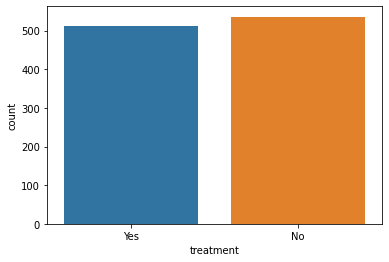

In [21]:
sns.countplot(df.treatment)

In [22]:
df.treatment.unique()

array(['Yes', 'No'], dtype=object)

In [23]:
df = df.replace({'treatment': {
    32 : 'No'
}})

In [24]:
df.treatment.value_counts()

No     536
Yes    512
Name: treatment, dtype: int64

In [25]:
find_proportion('treatment', df)

Proportion of No: 51%
Proportion of Yes: 49%


#### S.No

In [26]:
# A unique identification number. It is not required for model building
action['drop'] = ['S.No']

#### Timestamp

In [27]:
desc['Timestamp']

Description    Timestamp
Name: Timestamp, dtype: object

In [28]:
df.Timestamp.head(30)

0     2014-08-27 11:29:31
1     2014-08-27 11:29:37
2     2014-08-27 11:29:44
3     2014-08-27 11:29:46
4     2014-08-27 11:30:22
5     2014-08-27 11:31:22
6     2014-08-27 11:31:50
7     2014-08-27 11:32:05
8     2014-08-27 11:32:39
9     2014-08-27 11:32:43
10    2014-08-27 11:32:44
11    2014-08-27 11:32:49
12    2014-08-27 11:33:23
13    2014-08-27 11:33:26
14    2014-08-27 11:33:57
15    2014-08-27 11:34:00
16    2014-08-27 11:34:20
17    2014-08-27 11:34:37
18    2014-08-27 11:34:53
19    2014-08-27 11:35:08
20    2014-08-27 11:35:12
21    2014-08-27 11:35:24
22    2014-08-27 11:35:48
23    2014-08-27 11:36:24
24    2014-08-27 11:36:48
25    2014-08-27 11:37:08
26    2014-08-27 11:37:23
27    2014-08-27 11:37:59
28    2014-08-27 11:38:12
29    2014-08-27 11:38:18
Name: Timestamp, dtype: object

In [29]:
# It is the timestamp at which the survey was conducted.

action['drop'].append('Timestamp')

#### Age

In [30]:
df.Age.head()

0    37
1    44
2    32
3    31
4    31
Name: Age, dtype: int64

In [31]:
df.Age.describe()

count    1.048000e+03
mean     9.541988e+07
std      3.089010e+09
min     -1.726000e+03
25%      2.700000e+01
50%      3.100000e+01
75%      3.600000e+01
max      1.000000e+11
Name: Age, dtype: float64

In [32]:
df.Age.max()

99999999999

In [33]:
df.Age.min()

-1726

In [34]:
# There are some irregularity in the age column

<AxesSubplot:xlabel='Age'>

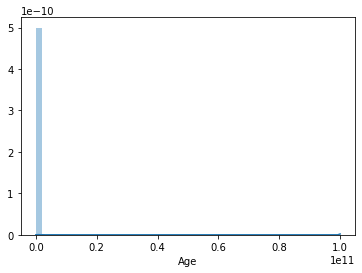

In [35]:
sns.distplot(df.Age)

In [36]:
df.Age.value_counts()

 29             73
 32             64
 26             63
 33             63
 27             61
 31             57
 30             56
 28             56
 34             52
 35             49
 25             48
 23             41
 24             38
 37             36
 36             31
 38             30
 39             26
 40             26
 43             23
 22             20
 42             17
 41             15
 21             15
 45              9
 19              9
 44              8
 46              7
 18              7
 50              5
 48              5
 49              4
 20              4
 51              4
 56              3
 57              3
 54              3
 55              3
 47              2
-29              1
 62              1
 329             1
-1726            1
 65              1
 5               1
 61              1
 60              1
 58              1
 53              1
 8               1
 99999999999     1
Name: Age, dtype: int64

In [37]:
# The values -29, -1726, 5, 8, 329 and 999999999999 does not belong in this group

In [38]:
mean_age = round(df[(df.Age<65) & (df.Age>8)].Age.mean())

In [39]:
df[df.Age>65] = mean_age
df[df.Age<8] = mean_age

In [40]:
df.Age.value_counts()

29    73
32    69
33    63
26    63
27    61
31    57
30    56
28    56
34    52
35    49
25    48
23    41
24    38
37    36
36    31
38    30
40    26
39    26
43    23
22    20
42    17
21    15
41    15
45     9
19     9
44     8
46     7
18     7
48     5
50     5
20     4
49     4
51     4
54     3
55     3
56     3
57     3
47     2
60     1
62     1
61     1
8      1
58     1
53     1
65     1
Name: Age, dtype: int64

<AxesSubplot:xlabel='Age'>

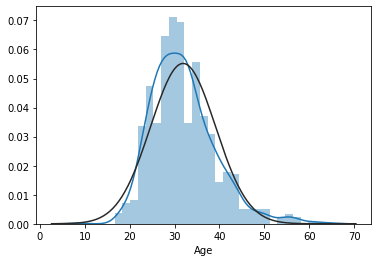

In [41]:
from scipy.stats import norm
sns.distplot(df.Age, fit=norm)

In [42]:
# The distribution is almost normal

In [43]:
test.Age.value_counts()

 32    18
 25    13
 34    13
 28    12
 29    12
 26    12
 23    10
 27    10
 31    10
 38     9
 24     8
 39     7
 40     7
 30     7
 37     7
 33     7
 36     6
 35     6
 41     5
 43     5
 46     5
 42     3
 44     3
 45     3
 20     2
 51     1
 50     1
 56     1
 60     1
-1      1
 48     1
 11     1
 22     1
 21     1
 72     1
Name: Age, dtype: int64

In [44]:
test = test.replace({'Age': {
    -1 : round(test.Age.mean())
}})

In [45]:
test.Age.value_counts()

32    18
25    13
34    13
26    12
28    12
29    12
23    10
27    10
31    10
38     9
33     8
24     8
37     7
40     7
39     7
30     7
36     6
35     6
41     5
43     5
46     5
42     3
44     3
45     3
20     2
50     1
56     1
60     1
51     1
11     1
48     1
22     1
21     1
72     1
Name: Age, dtype: int64

In [46]:
df.columns

Index(['S.No', 'Timestamp', 'Age', 'Gender', 'Country', 'state',
       'self_employed', 'family_history', 'treatment', 'work_interfere',
       'no_employees', 'remote_work', 'tech_company', 'benefits',
       'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [47]:
### What is the mean age groups of people who really need treatment and those who don't? ###

df.groupby('treatment').mean()['Age']

treatment
32     32.000000
No     31.271536
Yes    32.555992
Name: Age, dtype: float64

<AxesSubplot:xlabel='treatment', ylabel='Age'>

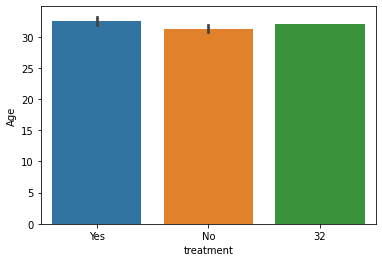

In [48]:
sns.barplot(x='treatment', y='Age', data=df)

In [49]:
# The mean age is almost similar for those who need treatment and those who don't

In [50]:
p_value['Age'] = t_test('Age', 'treatment', df)

Ho:  There is no significant impact of Age on treatment (No predictability)
Ha:  There is a significant impact of Age on treatment (Good predictor)


Test Statistics:  2.8698501571404846
p-value:  0.004189746365937874


Reject Ho,  There is a significant impact of Age on treatment (Good predictor)


In [51]:
# Age has an impact, but the p-value suggests that, the impact is minimal.

#### Gender

In [52]:
desc['Gender']

Description    Gender
Name: Gender, dtype: object

In [53]:
df.Gender.describe()

count     1048
unique      45
top       Male
freq       515
Name: Gender, dtype: object

In [54]:
df.Gender.value_counts()

Male                        515
male                        161
M                           100
Female                       99
female                       48
F                            33
m                            30
f                            13
32                            5
Make                          4
Woman                         2
Man                           2
Cis Male                      2
Female                        2
Female (trans)                2
Male-ish                      1
msle                          1
Guy (-ish) ^_^                1
Trans-female                  1
Enby                          1
Androgyne                     1
male leaning androgynous      1
Neuter                        1
Nah                           1
Femake                        1
Mail                          1
fluid                         1
Genderqueer                   1
queer/she/they                1
Female (cis)                  1
Cis Female                    1
Male    

In [55]:
df.Gender.unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 32, 'Woman', 'f', 'Mal', 'Male (CIS)',
       'queer/she/they', 'non-binary', 'Femake', 'woman', 'Make', 'Nah',
       'Enby', 'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr'], dtype=object)

In [56]:
df = df.replace({'Gender': {
    'Female': 'Female', 'M': 'Male', 'Male': 'Male' , 'male': 'Male', 'female': 'Female', 'm': 'Male', 
    'Male-ish': 'Male', 'maile': 'Male',
       'Trans-female': 'Female', 'Cis Female': 'Female', 'F': 'Female', 'something kinda male?': 'Male',
       'Cis Male': 'Male', 32: 'Other', 'Woman': 'Female', 'f': 'Female', 'Mal': 'Male', 'Male (CIS)': 'Male',
       'queer/she/they': 'Female', 'non-binary': 'Other', 'Femake': 'Female', 'woman': 'Female', 'Make': 'Male', 'Nah': 'Other',
       'Enby': 'Other', 'fluid': 'Other', 'Genderqueer': 'Other', 'Female ': 'Female', 'Androgyne': 'Other', 'Agender': 'Other',
       'cis-female/femme': 'Female', 'Guy (-ish) ^_^': 'Male', 'male leaning androgynous': 'Male',
       'Male ': 'Male', 'Man': 'Male', 'Trans woman': 'Female', 'msle': 'Male', 'Neuter': 'Other', 'Female (trans)': 'Female',
       'queer': 'Other', 'Female (cis)': 'Female', 'Mail': 'Male', 'cis male': 'Male', 'A little about you': 'Other',
       'Malr': 'Male'
}})

In [57]:
df.Gender.value_counts()

Male      826
Female    207
Other      15
Name: Gender, dtype: int64

In [58]:
test.Gender.value_counts()

Male                                              96
male                                              44
Female                                            22
M                                                 16
female                                            14
F                                                  5
m                                                  4
Male                                               2
f                                                  2
Cis Man                                            1
p                                                  1
ostensibly male, unsure what that really means     1
Woman                                              1
femail                                             1
Name: Gender, dtype: int64

In [59]:
test.Gender.unique()

array(['Male', 'female', 'Female', 'M', 'male', 'Male ', 'm', 'p', 'F',
       'Woman', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means', 'f'],
      dtype=object)

In [60]:
test = test.replace({'Gender': {
    'Male': 'Male', 'female': 'Female', 'Female': 'Female', 'M': 'Male', 'male': 'Male', 'Male ': 'Male',
    'm': 'Male', 'p': 'Other', 'F': 'Female',
       'Woman': 'Female', 'femail': 'Female', 'Cis Man': 'Male',
       'ostensibly male, unsure what that really means': 'Male', 'f': 'Female'
}})

In [61]:
test.Gender.value_counts()

Male      164
Female     45
Other       1
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

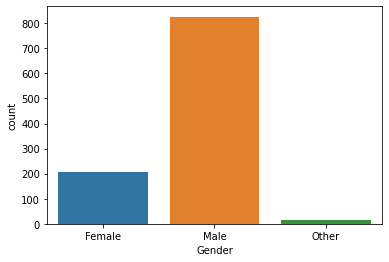

In [62]:
sns.countplot(df.Gender)

In [63]:
df.columns

Index(['S.No', 'Timestamp', 'Age', 'Gender', 'Country', 'state',
       'self_employed', 'family_history', 'treatment', 'work_interfere',
       'no_employees', 'remote_work', 'tech_company', 'benefits',
       'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [64]:
# Lets see the relation between treatment and gender

In [65]:
p_value['Gender'] = chi2('Gender', 'treatment', df)

Ho:  There is no significant assosiation between Gender and treatment (No predictability)
Ha:  There is a significant assosiation between Gender and treatment (Good predictor)


chi-square stats:  391.0574987524923
p-value:  2.3788616385396698e-83


Reject null hypothesis,  There is a significant assosiation between Gender and treatment (Good predictor)


In [66]:
pd.crosstab(df.Gender, df.treatment)

treatment,32,No,Yes
Gender,,,
Female,0,66,141
Male,0,467,359
Other,5,1,9


#### Country

In [67]:
desc['Country']

Description    Country
Name: Country, dtype: object

In [68]:
df.Country.describe()

count              1048
unique               42
top       United States
freq                641
Name: Country, dtype: object

In [69]:
df.Country.value_counts()

United States             641
United Kingdom            152
Canada                     64
Germany                    37
Netherlands                18
Australia                  18
Ireland                    13
France                     11
India                       8
New Zealand                 6
Italy                       6
Switzerland                 6
Sweden                      6
32                          5
Brazil                      5
Poland                      5
Israel                      4
South Africa                4
Belgium                     4
Austria                     3
Bulgaria                    3
Mexico                      3
Russia                      3
Singapore                   2
Portugal                    2
Finland                     2
Denmark                     2
Hungary                     1
Latvia                      1
Norway                      1
Spain                       1
Croatia                     1
Romania                     1
Bahamas, T

In [70]:
df.Country.unique()

array(['United States', 'Canada', 'United Kingdom', 'Bulgaria', 'France',
       'Portugal', 'Netherlands', 'Switzerland', 'Poland', 'Australia',
       'Germany', 'Russia', 'Mexico', 'Brazil', 'Slovenia', 'Costa Rica',
       'Austria', 32, 'Ireland', 'India', 'South Africa', 'Italy',
       'Sweden', 'Colombia', 'Latvia', 'Romania', 'Belgium',
       'New Zealand', 'Spain', 'Finland', 'Uruguay', 'Israel',
       'Bosnia and Herzegovina', 'Hungary', 'Singapore', 'Japan',
       'Nigeria', 'Croatia', 'Norway', 'Thailand', 'Denmark',
       'Bahamas, The'], dtype=object)

In [71]:
df[df.Country == 32]

,S.No,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
143,32,32,32,Other,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32
364,32,32,32,Other,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32
390,32,32,32,Other,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32
715,32,32,32,Other,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32
734,32,32,32,Other,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32


In [72]:
df = df.drop([143, 364, 390, 715, 734], axis=0)

In [73]:
df[df.Country == 32]

,S.No,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments


In [74]:
df[df['S.No']==32]

,S.No,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
31,32,2014-08-27 11:38:55,31,Male,United States,PA,Yes,Yes,No,Rarely,1-5,Yes,Yes,No,Yes,No,No,Don't know,Somewhat difficult,Yes,No,No,No,No,No,No,Yes,NaN


In [75]:
df.shape

(1043, 28)

In [76]:
test[test['S.No'] == 32]

,S.No,Timestamp,Age,Gender,Country,state,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
31,32,2014-08-29 15:59:55,25,Male,United States,UT,No,Yes,Often,1-5,No,Yes,No,Yes,No,No,Yes,Very easy,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN


In [77]:
df.Country.unique()

array(['United States', 'Canada', 'United Kingdom', 'Bulgaria', 'France',
       'Portugal', 'Netherlands', 'Switzerland', 'Poland', 'Australia',
       'Germany', 'Russia', 'Mexico', 'Brazil', 'Slovenia', 'Costa Rica',
       'Austria', 'Ireland', 'India', 'South Africa', 'Italy', 'Sweden',
       'Colombia', 'Latvia', 'Romania', 'Belgium', 'New Zealand', 'Spain',
       'Finland', 'Uruguay', 'Israel', 'Bosnia and Herzegovina',
       'Hungary', 'Singapore', 'Japan', 'Nigeria', 'Croatia', 'Norway',
       'Thailand', 'Denmark', 'Bahamas, The'], dtype=object)

In [78]:
df.Country.value_counts()

United States             641
United Kingdom            152
Canada                     64
Germany                    37
Netherlands                18
Australia                  18
Ireland                    13
France                     11
India                       8
New Zealand                 6
Italy                       6
Switzerland                 6
Sweden                      6
Brazil                      5
Poland                      5
Israel                      4
South Africa                4
Belgium                     4
Austria                     3
Bulgaria                    3
Mexico                      3
Russia                      3
Singapore                   2
Portugal                    2
Finland                     2
Denmark                     2
Hungary                     1
Latvia                      1
Norway                      1
Spain                       1
Croatia                     1
Romania                     1
Bahamas, The                1
Japan     

In [79]:
df = df.replace({'Country': {
    'Bulgaria': 'Other', 'France': 'Other',
       'Portugal': 'Other', 'Netherlands': 'Other', 'Switzerland': 'Other', 'Poland': 'Other', 'Australia': 'Other',
       'Germany': 'Other', 'Russia': 'Other', 'Mexico': 'Other', 'Brazil': 'Other', 'Slovenia': 'Other', 'Costa Rica': 'Other',
       'Austria': 'Other', 'Ireland': 'Other', 'India': 'Other', 'South Africa': 'Other', 'Italy': 'Other', 'Sweden': 'Other',
       'Colombia': 'Other', 'Latvia': 'Other', 'Romania': 'Other', 'Belgium': 'Other', 'New Zealand': 'Other', 'Spain': 'Other',
       'Finland': 'Other', 'Uruguay': 'Other', 'Israel': 'Other', 'Bosnia and Herzegovina': 'Other',
       'Hungary': 'Other', 'Singapore': 'Other', 'Japan': 'Other', 'Nigeria': 'Other', 'Croatia': 'Other', 'Norway': 'Other',
       'Thailand': 'Other', 'Denmark': 'Other', 'Bahamas, The': 'Other'
}})

In [80]:
df.Country.value_counts()

United States     641
Other             186
United Kingdom    152
Canada             64
Name: Country, dtype: int64

<AxesSubplot:xlabel='Country', ylabel='count'>

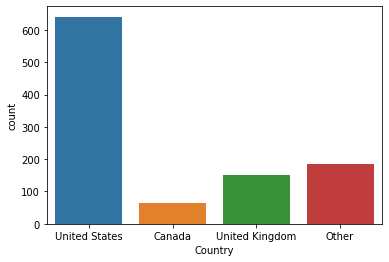

In [81]:
sns.countplot(df.Country)

In [82]:
test.Country.value_counts()

United States     106
United Kingdom     32
Ireland            14
Netherlands         9
Canada              8
Germany             8
Australia           3
Singapore           2
France              2
New Zealand         2
Belgium             2
Greece              2
India               2
South Africa        2
Poland              2
Philippines         1
Croatia             1
Italy               1
Switzerland         1
Colombia            1
Israel              1
Czech Republic      1
Georgia             1
Bulgaria            1
Moldova             1
China               1
Sweden              1
Finland             1
Brazil              1
Name: Country, dtype: int64

In [83]:
test = test.replace({'Country': {
    'Bulgaria': 'Other', 'France': 'Other',
       'Portugal': 'Other', 'Netherlands': 'Other', 'Switzerland': 'Other', 'Poland': 'Other', 'Australia': 'Other',
       'Germany': 'Other', 'Russia': 'Other', 'Mexico': 'Other', 'Brazil': 'Other', 'Slovenia': 'Other', 'Costa Rica': 'Other',
       'Austria': 'Other', 'Ireland': 'Other', 'India': 'Other', 'South Africa': 'Other', 'Italy': 'Other', 'Sweden': 'Other',
       'Colombia': 'Other', 'Latvia': 'Other', 'Romania': 'Other', 'Belgium': 'Other', 'New Zealand': 'Other', 'Spain': 'Other',
       'Finland': 'Other', 'Uruguay': 'Other', 'Israel': 'Other', 'Bosnia and Herzegovina': 'Other',
       'Hungary': 'Other', 'Singapore': 'Other', 'Japan': 'Other', 'Nigeria': 'Other', 'Croatia': 'Other', 'Norway': 'Other',
       'Thailand': 'Other', 'Denmark': 'Other', 'Bahamas, The': 'Other', 'Greece': 'Other', 'Czech Republic': 'Other',
        'China': 'Other', 'Philippines': 'Other', 'Moldova': 'Other', 'Georgia': 'Other'
}})

In [84]:
test.Country.value_counts()

United States     106
Other              64
United Kingdom     32
Canada              8
Name: Country, dtype: int64

In [85]:
p_value['Country'] = chi2('Country', 'treatment', df)

Ho:  There is no significant assosiation between Country and treatment (No predictability)
Ha:  There is a significant assosiation between Country and treatment (Good predictor)


chi-square stats:  17.64510204353782
p-value:  0.0005205517192911775


Reject null hypothesis,  There is a significant assosiation between Country and treatment (Good predictor)


In [86]:
# Country is a significant predictor, but the p-value is 0.0005.

#### state

In [87]:
desc['state']

Description    If you live in the United States, which state or territory do you live in?
Name: state, dtype: object

In [88]:
df.state.describe()

count     633
unique     45
top        CA
freq      123
Name: state, dtype: object

In [89]:
df.state.isnull().sum()

410

In [90]:
df.state.value_counts()

CA    123
WA     60
NY     49
TN     39
TX     38
PA     26
OR     26
OH     22
IL     21
MA     20
IN     20
MI     19
MN     16
VA     12
GA     12
MO     12
WI     10
NC     10
FL     10
CO      9
MD      7
AZ      7
UT      6
OK      5
KY      5
IA      4
AL      4
CT      4
SC      4
DC      4
KS      3
SD      3
NH      3
NV      3
NJ      3
NM      2
WY      2
VT      2
NE      2
ME      1
LA      1
MS      1
WV      1
RI      1
ID      1
Name: state, dtype: int64

In [91]:
p_value['state'] = chi2('state', 'treatment', df)

Ho:  There is no significant assosiation between state and treatment (No predictability)
Ha:  There is a significant assosiation between state and treatment (Good predictor)


chi-square stats:  57.43709792006255
p-value:  0.08416808868755185


Fail to reject null hypothesis,  There is no significant assosiation between state and treatment (No predictability)


In [92]:
# There are many null values in the column, and there is no significant association between state and treatment

action['drop'].append('state')

#### self_employed

In [93]:
df.self_employed.describe()

count     1025
unique       2
top         No
freq       902
Name: self_employed, dtype: object

In [94]:
df.self_employed.value_counts()

No     902
Yes    123
Name: self_employed, dtype: int64

In [95]:
find_proportion('self_employed', df)

Proportion of No: 86%
Proportion of Yes: 12%


<AxesSubplot:xlabel='self_employed', ylabel='count'>

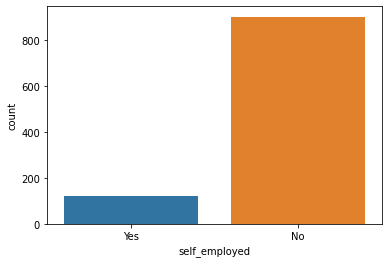

In [96]:
sns.countplot(df.self_employed)

In [97]:
df.columns

Index(['S.No', 'Timestamp', 'Age', 'Gender', 'Country', 'state',
       'self_employed', 'family_history', 'treatment', 'work_interfere',
       'no_employees', 'remote_work', 'tech_company', 'benefits',
       'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [98]:
df.self_employed.isnull().sum()

18

In [99]:
df[df.self_employed.isnull()]

,S.No,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,1,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2,2014-08-27 11:29:37,44,Male,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,3,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,4,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,5,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,6,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,No,Yes,Yes,Not sure,No,Don't know,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,7,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,Yes,Yes,No,No,No,No,No,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,8,2014-08-27 11:32:05,39,Male,Canada,NaN,NaN,No,No,Never,1-5,Yes,Yes,No,Yes,No,No,Yes,Don't know,No,No,No,No,No,No,No,No,NaN
8,9,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,No,Yes,Yes,Yes,No,No,No,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,10,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,No,Yes,Don't know,No,Don't know,Don't know,Don't know,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


In [100]:
df.self_employed.fillna('No', inplace=True, axis=0)

In [101]:
df.self_employed.isnull().sum()

0

In [102]:
test.self_employed.value_counts()

No     189
Yes     21
Name: self_employed, dtype: int64

<AxesSubplot:xlabel='self_employed', ylabel='Age'>

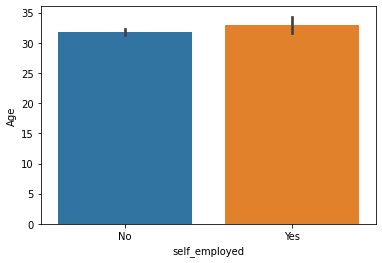

In [103]:
# Is Age impacting self employment----no

sns.barplot(x=df.self_employed, y=df.Age)

In [104]:
# Is the Country impacting self employment

pd.crosstab(df.self_employed, df.Country, normalize='columns') * 100

Country,Canada,Other,United Kingdom,United States
self_employed,,,,
No,85.9375,77.419355,83.552632,92.667707
Yes,14.0625,22.580645,16.447368,7.332293


In [105]:
# In US only 7.4 % of the people are self_employed

In [106]:
# Does self-employment determine the status of treatment? ###

pd.crosstab(df.self_employed, df.treatment, normalize='columns') * 100

treatment,No,Yes
self_employed,,
No,88.576779,87.819253
Yes,11.423221,12.180747


In [107]:
# It appears that there is not much association between self_employed and treatment. Lets do a chi2 test

p_value['self_employed'] = chi2('self_employed', 'treatment', df)

Ho:  There is no significant assosiation between self_employed and treatment (No predictability)
Ha:  There is a significant assosiation between self_employed and treatment (Good predictor)


chi-square stats:  0.08016089900597238
p-value:  0.7770794838173412


Fail to reject null hypothesis,  There is no significant assosiation between self_employed and treatment (No predictability)


In [108]:
# chi2 test also tells the same thing.

action['drop'].append('self_employed')

#### family_history

In [109]:
desc['family_history']

Description    Do you have a family history of mental illness?
Name: family_history, dtype: object

In [110]:
df.family_history.describe()

count     1043
unique       2
top         No
freq       639
Name: family_history, dtype: object

In [111]:
df.family_history.value_counts()

No     639
Yes    404
Name: family_history, dtype: int64

<AxesSubplot:xlabel='family_history', ylabel='count'>

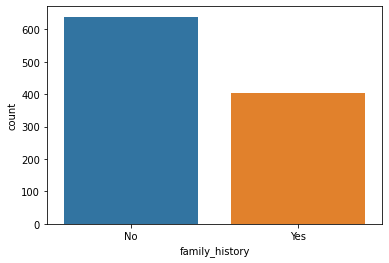

In [112]:
sns.countplot(df.family_history)

In [113]:
test.family_history.value_counts()

No     123
Yes     87
Name: family_history, dtype: int64

In [114]:
df.columns

Index(['S.No', 'Timestamp', 'Age', 'Gender', 'Country', 'state',
       'self_employed', 'family_history', 'treatment', 'work_interfere',
       'no_employees', 'remote_work', 'tech_company', 'benefits',
       'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [115]:
### Does family history of mental illness affect the person? ###

pd.crosstab(df.family_history, df.treatment, normalize='columns') * 100

treatment,No,Yes
family_history,,
No,79.588015,42.043222
Yes,20.411985,57.956778


In [116]:
# If the family history shows mental illness, then there is a 57% chance that the person need treatment.

In [117]:
p_value['family_history'] = chi2('family_history', 'treatment', df)

Ho:  There is no significant assosiation between family_history and treatment (No predictability)
Ha:  There is a significant assosiation between family_history and treatment (Good predictor)


chi-square stats:  153.21822626181694
p-value:  3.432259316054486e-35


Reject null hypothesis,  There is a significant assosiation between family_history and treatment (Good predictor)


In [118]:
# family history is a good predictor

#### work_interfere

In [119]:
desc['work_interfere']

Description    If you have a mental health condition, do you feel that it interferes with your work?
Name: work_interfere, dtype: object

In [120]:
df.work_interfere.describe()

count           809
unique            4
top       Sometimes
freq            385
Name: work_interfere, dtype: object

In [121]:
df.work_interfere.value_counts()

Sometimes    385
Never        178
Rarely       144
Often        102
Name: work_interfere, dtype: int64

In [122]:
test.work_interfere.value_counts()

Sometimes    79
Often        39
Never        35
Rarely       29
Name: work_interfere, dtype: int64

In [123]:
find_proportion('work_interfere', df)

Proportion of Sometimes: 37%
Proportion of Never: 17%
Proportion of Rarely: 14%
Proportion of Often: 10%


In [124]:
df.work_interfere.isnull().sum()

234

In [125]:
df[df.work_interfere.isnull()]

,S.No,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
19,20,2014-08-27 11:35:08,36,Male,Other,NaN,Yes,Yes,No,NaN,6-25,Yes,Yes,No,No,Yes,No,Yes,Somewhat easy,No,No,Some of them,Some of them,Maybe,Maybe,Don't know,No,NaN
26,27,2014-08-27 11:37:23,33,Male,United States,TN,No,No,No,NaN,1-5,No,Yes,Don't know,Not sure,No,Don't know,Don't know,Don't know,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
37,38,2014-08-27 11:41:50,38,Male,Other,NaN,No,No,No,NaN,100-500,No,Yes,No,Yes,No,No,Don't know,Somewhat easy,Maybe,No,Some of them,Some of them,No,Maybe,No,No,NaN
38,39,2014-08-27 11:42:08,50,Male,United States,IN,No,No,No,NaN,100-500,No,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,NaN
41,42,2014-08-27 11:42:31,35,Male,United States,MI,No,No,No,NaN,More than 1000,Yes,Yes,Yes,Not sure,Don't know,Yes,Don't know,Somewhat difficult,Yes,Yes,Some of them,No,No,Maybe,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029,1030,2014-08-29 10:33:45,34,Male,United States,IN,No,No,No,NaN,More than 1000,No,No,Yes,Not sure,Yes,Don't know,Don't know,Don't know,Maybe,Maybe,Some of them,Yes,No,No,Don't know,No,NaN
1030,1031,2014-08-29 10:38:23,26,Male,United States,MN,No,Yes,No,NaN,6-25,No,Yes,Don't know,Not sure,No,No,Don't know,Don't know,No,No,Some of them,Yes,No,No,Yes,No,NaN
1037,1038,2014-08-29 11:05:00,44,Male,United States,MO,No,No,No,NaN,More than 1000,Yes,No,Don't know,No,Don't know,Don't know,Yes,Don't know,Yes,No,Some of them,No,No,No,No,No,NaN
1039,1040,2014-08-29 11:12:22,35,Male,United States,OR,No,No,No,NaN,6-25,Yes,Yes,No,No,No,No,Don't know,Don't know,No,No,No,No,No,No,Don't know,No,NaN


In [126]:
df.work_interfere.fillna("Don't know", inplace=True, axis=0)

In [127]:
df.work_interfere.isnull().sum()

0

<AxesSubplot:xlabel='work_interfere', ylabel='count'>

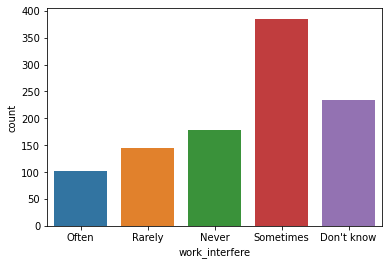

In [128]:
sns.countplot(df.work_interfere)

In [129]:
test.work_interfere.isnull().sum()

28

In [130]:
test.work_interfere.fillna("Don't know", inplace=True, axis=0)

<AxesSubplot:xlabel='work_interfere', ylabel='count'>

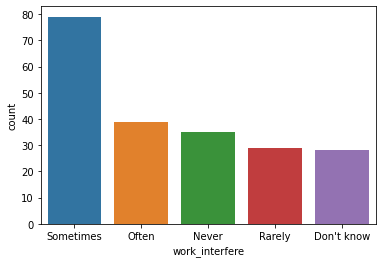

In [131]:
sns.countplot(test.work_interfere)

In [132]:
df.columns

Index(['S.No', 'Timestamp', 'Age', 'Gender', 'Country', 'state',
       'self_employed', 'family_history', 'treatment', 'work_interfere',
       'no_employees', 'remote_work', 'tech_company', 'benefits',
       'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [133]:
pd.crosstab(df.work_interfere, df.treatment, normalize='columns') * 100

treatment,No,Yes
work_interfere,,
Don't know,43.445693,0.392927
Never,28.651685,4.911591
Often,3.183521,16.699411
Rarely,7.303371,20.628684
Sometimes,17.415730,57.367387


In [134]:
### Does work_interference and treatment related? ###

p_value['work_interfere'] = chi2('work_interfere', 'treatment', df)

Ho:  There is no significant assosiation between work_interfere and treatment (No predictability)
Ha:  There is a significant assosiation between work_interfere and treatment (Good predictor)


chi-square stats:  496.24226570848884
p-value:  4.352830219132e-106


Reject null hypothesis,  There is a significant assosiation between work_interfere and treatment (Good predictor)


In [135]:
# work_interfere is a good predictor

#### no_employees

In [136]:
desc['no_employees']

Description    How many employees does your company or organization have?
Name: no_employees, dtype: object

In [137]:
df.no_employees.describe()

count     1043
unique       6
top       6-25
freq       244
Name: no_employees, dtype: object

In [138]:
df.no_employees.value_counts()

6-25              244
26-100            237
More than 1000    226
100-500           149
1-5               132
500-1000           55
Name: no_employees, dtype: int64

In [139]:
test.no_employees.value_counts()

More than 1000    55
26-100            51
6-25              45
1-5               28
100-500           26
500-1000           5
Name: no_employees, dtype: int64

<AxesSubplot:xlabel='no_employees', ylabel='count'>

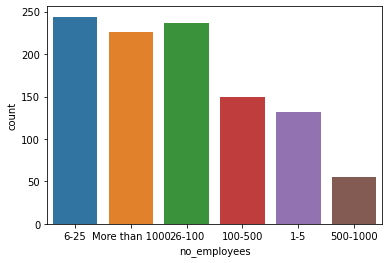

In [140]:
sns.countplot(df.no_employees)

In [141]:
df.columns

Index(['S.No', 'Timestamp', 'Age', 'Gender', 'Country', 'state',
       'self_employed', 'family_history', 'treatment', 'work_interfere',
       'no_employees', 'remote_work', 'tech_company', 'benefits',
       'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [142]:
### Does size of the company changes the perspective of work interfere? ###

pd.crosstab(df.no_employees, df.work_interfere, normalize='index') * 100

work_interfere,Don't know,Never,Often,Rarely,Sometimes
no_employees,,,,,
1-5,13.636364,12.878788,14.393939,13.636364,45.454545
100-500,21.476510,16.107383,6.040268,18.120805,38.255034
26-100,22.784810,19.831224,10.548523,8.860759,37.974684
500-1000,29.090909,25.454545,1.818182,16.363636,27.272727
6-25,25.409836,15.163934,12.295082,13.934426,33.196721
More than 1000,23.008850,17.256637,7.964602,15.486726,36.283186


In [143]:
pd.crosstab(df.no_employees, df.treatment, normalize='columns') * 100

treatment,No,Yes
no_employees,,
1-5,11.610487,13.752456
100-500,13.295880,15.324165
26-100,22.284644,23.182711
500-1000,5.805243,4.715128
6-25,26.591760,20.039293
More than 1000,20.411985,22.986248


In [144]:
# no_employees vs treatment

p_value['no_employees'] = chi2('no_employees', 'treatment', df)

Ho:  There is no significant assosiation between no_employees and treatment (No predictability)
Ha:  There is a significant assosiation between no_employees and treatment (Good predictor)


chi-square stats:  7.9547361743312965
p-value:  0.158747911852401


Fail to reject null hypothesis,  There is no significant assosiation between no_employees and treatment (No predictability)


In [145]:
# no_employees is not a good predictor

action['drop'].append('no_employees')

#### remote_work

In [146]:
desc['remote_work']

Description    Do you work remotely (outside of an office) at least 50% of the time?
Name: remote_work, dtype: object

In [147]:
df.remote_work.describe()

count     1043
unique       2
top         No
freq       730
Name: remote_work, dtype: object

In [148]:
df.remote_work.value_counts()

No     730
Yes    313
Name: remote_work, dtype: int64

In [149]:
test.remote_work.value_counts()

No     150
Yes     60
Name: remote_work, dtype: int64

<AxesSubplot:xlabel='remote_work', ylabel='count'>

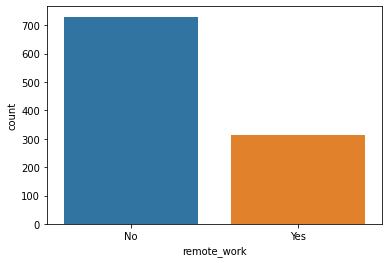

In [150]:
sns.countplot(df.remote_work)

In [151]:
df.remote_work.isnull().sum()

0

In [152]:
test.remote_work.isnull().sum()

0

In [153]:
df.columns

Index(['S.No', 'Timestamp', 'Age', 'Gender', 'Country', 'state',
       'self_employed', 'family_history', 'treatment', 'work_interfere',
       'no_employees', 'remote_work', 'tech_company', 'benefits',
       'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [154]:
p_value['remote_work'] = chi2('remote_work', 'treatment', df)

Ho:  There is no significant assosiation between remote_work and treatment (No predictability)
Ha:  There is a significant assosiation between remote_work and treatment (Good predictor)


chi-square stats:  1.0976513152921816
p-value:  0.2947821207739679


Fail to reject null hypothesis,  There is no significant assosiation between remote_work and treatment (No predictability)


#### tech_company

In [155]:
desc['tech_company']

Description    Is your employer primarily a tech company/organization?
Name: tech_company, dtype: object

In [156]:
df.tech_company.describe()

count     1043
unique       2
top        Yes
freq       867
Name: tech_company, dtype: object

In [157]:
df.tech_company.value_counts()

Yes    867
No     176
Name: tech_company, dtype: int64

<AxesSubplot:xlabel='tech_company', ylabel='count'>

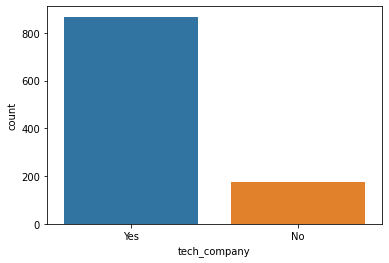

In [158]:
sns.countplot(df.tech_company)

In [159]:
find_proportion('tech_company', df)

Proportion of Yes: 83%
Proportion of No: 17%


In [160]:
test.tech_company.value_counts()

Yes    161
No      49
Name: tech_company, dtype: int64

In [161]:
pd.crosstab(df.tech_company, df.treatment, normalize='columns') * 100

treatment,No,Yes
tech_company,,
No,15.355805,18.467583
Yes,84.644195,81.532417


In [162]:
p_value['tech_company'] = chi2('tech_company', 'treatment', df)

Ho:  There is no significant assosiation between tech_company and treatment (No predictability)
Ha:  There is a significant assosiation between tech_company and treatment (Good predictor)


chi-square stats:  1.583986751960493
p-value:  0.2081873674069063


Fail to reject null hypothesis,  There is no significant assosiation between tech_company and treatment (No predictability)


In [163]:
# tech company is a bad predictor

action['drop'].append('tech_company')

#### benefits

In [164]:
desc['benefits']

Description    Does your employer provide mental health benefits?
Name: benefits, dtype: object

In [165]:
df.benefits.describe()

count     1043
unique       3
top        Yes
freq       398
Name: benefits, dtype: object

In [166]:
df.benefits.value_counts()

Yes           398
Don't know    341
No            304
Name: benefits, dtype: int64

In [167]:
test.benefits.value_counts()

Yes           77
No            67
Don't know    66
Name: benefits, dtype: int64

<AxesSubplot:xlabel='benefits', ylabel='count'>

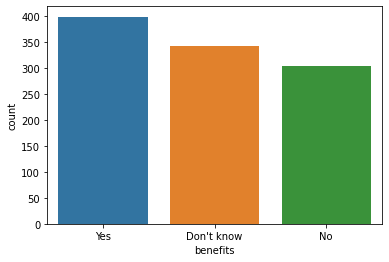

In [168]:
sns.countplot(df.benefits)

In [169]:
pd.crosstab(df.benefits, df.treatment, normalize='columns') * 100

treatment,No,Yes
benefits,,
Don't know,41.011236,23.968566
No,30.898876,27.308448
Yes,28.089888,48.722986


In [170]:
p_value['benefits'] = chi2('benefits', 'treatment', df)

Ho:  There is no significant assosiation between benefits and treatment (No predictability)
Ha:  There is a significant assosiation between benefits and treatment (Good predictor)


chi-square stats:  53.37814711596609
p-value:  2.56497198861586e-12


Reject null hypothesis,  There is a significant assosiation between benefits and treatment (Good predictor)


In [171]:
# benefits is a good predictor 

#### care_options

In [172]:
desc['care_options']

Description    Do you know the options for mental health care your employer provides?
Name: care_options, dtype: object

In [173]:
df.care_options.describe()

count     1043
unique       3
top         No
freq       420
Name: care_options, dtype: object

In [174]:
df.care_options.value_counts()

No          420
Yes         361
Not sure    262
Name: care_options, dtype: int64

In [175]:
test.care_options.value_counts()

Yes         80
No          79
Not sure    51
Name: care_options, dtype: int64

<AxesSubplot:xlabel='care_options', ylabel='count'>

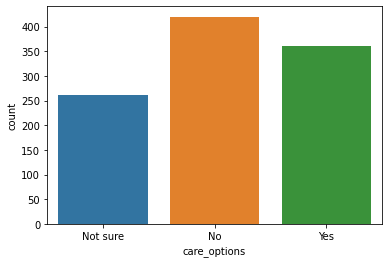

In [176]:
sns.countplot(df.care_options)

In [177]:
pd.crosstab(df.care_options, df.treatment, normalize='columns') * 100

treatment,No,Yes
care_options,,
No,48.127341,32.023576
Not sure,29.588015,20.432220
Yes,22.284644,47.544204


In [178]:
p_value['care_options'] = chi2('care_options', 'treatment', df)

Ho:  There is no significant assosiation between care_options and treatment (No predictability)
Ha:  There is a significant assosiation between care_options and treatment (Good predictor)


chi-square stats:  73.5194595139122
p-value:  1.0850561436450189e-16


Reject null hypothesis,  There is a significant assosiation between care_options and treatment (Good predictor)


In [179]:
# care options is a good predictor

#### wellness_program

In [180]:
desc['wellness_program']

Description    Has your employer ever discussed mental health as part of an employee wellness program?
Name: wellness_program, dtype: object

In [181]:
df.wellness_program.describe()

count     1043
unique       3
top         No
freq       688
Name: wellness_program, dtype: object

In [182]:
df.wellness_program.value_counts()

No            688
Yes           193
Don't know    162
Name: wellness_program, dtype: int64

In [183]:
test.wellness_program.value_counts()

No            150
Yes            35
Don't know     25
Name: wellness_program, dtype: int64

<AxesSubplot:xlabel='wellness_program', ylabel='count'>

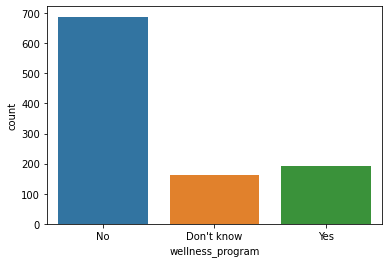

In [184]:
sns.countplot(df.wellness_program)

In [185]:
pd.crosstab(df.wellness_program, df.treatment, normalize='columns') * 100

treatment,No,Yes
wellness_program,,
Don't know,17.790262,13.163065
No,66.853933,65.029470
Yes,15.355805,21.807466


In [186]:
p_value['wellness_program'] = chi2('wellness_program', 'treatment', df)

Ho:  There is no significant assosiation between wellness_program and treatment (No predictability)
Ha:  There is a significant assosiation between wellness_program and treatment (Good predictor)


chi-square stats:  9.585851626675328
p-value:  0.008288172227484888


Reject null hypothesis,  There is a significant assosiation between wellness_program and treatment (Good predictor)


In [187]:
# There is an assosiation but it is very less

#### seek_help

In [188]:
desc['seek_help']

Description    Does your employer provide resources to learn more about mental health issues and how to seek help?
Name: seek_help, dtype: object

In [189]:
df.seek_help.describe()

count     1043
unique       3
top         No
freq       530
Name: seek_help, dtype: object

In [190]:
df.seek_help.value_counts()

No            530
Don't know    309
Yes           204
Name: seek_help, dtype: int64

In [191]:
test.seek_help.value_counts()

No            112
Don't know     54
Yes            44
Name: seek_help, dtype: int64

<AxesSubplot:xlabel='seek_help', ylabel='count'>

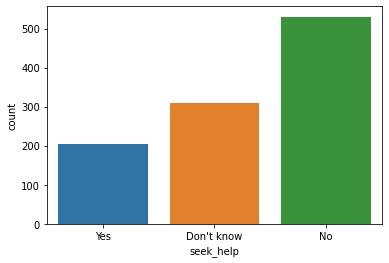

In [192]:
sns.countplot(df.seek_help)

In [193]:
find_proportion('seek_help', df)

Proportion of No: 51%
Proportion of Don't know: 30%
Proportion of Yes: 20%


In [194]:
pd.crosstab(df.seek_help, df.treatment, normalize='columns') * 100

treatment,No,Yes
seek_help,,
Don't know,32.771536,26.326130
No,51.310861,50.294695
Yes,15.917603,23.379175


In [195]:
p_value['seek_help'] = chi2('seek_help', 'treatment', df)

Ho:  There is no significant assosiation between seek_help and treatment (No predictability)
Ha:  There is a significant assosiation between seek_help and treatment (Good predictor)


chi-square stats:  11.12527567478441
p-value:  0.00383863732979991


Reject null hypothesis,  There is a significant assosiation between seek_help and treatment (Good predictor)


In [196]:
# There is an assosiation, but it is only minimal.

#### anonymity

In [197]:
desc['anonymity']

Description    Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
Name: anonymity, dtype: object

In [198]:
df.anonymity.describe()

count           1043
unique             3
top       Don't know
freq             681
Name: anonymity, dtype: object

In [199]:
df.anonymity.value_counts()

Don't know    681
Yes           311
No             51
Name: anonymity, dtype: int64

In [200]:
test.anonymity.value_counts()

Don't know    134
Yes            63
No             13
Name: anonymity, dtype: int64

<AxesSubplot:xlabel='anonymity', ylabel='count'>

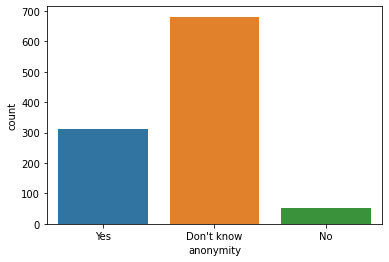

In [201]:
sns.countplot(df.anonymity)

In [202]:
pd.crosstab(df.anonymity, df.treatment, normalize='columns') * 100

treatment,No,Yes
anonymity,,
Don't know,72.097378,58.153242
No,3.745318,6.090373
Yes,24.157303,35.756385


In [203]:
p_value['anonymity'] = chi2('anonymity', 'treatment', df)

Ho:  There is no significant assosiation between anonymity and treatment (No predictability)
Ha:  There is a significant assosiation between anonymity and treatment (Good predictor)


chi-square stats:  22.44979279511238
p-value:  1.3337960735626316e-05


Reject null hypothesis,  There is a significant assosiation between anonymity and treatment (Good predictor)


In [204]:
# anonymity is a good predictor

#### leave

In [205]:
desc['leave']

Description    How easy is it for you to take medical leave for a mental health condition?
Name: leave, dtype: object

In [206]:
df.leave.describe()

count           1043
unique             5
top       Don't know
freq             464
Name: leave, dtype: object

In [207]:
df.leave.value_counts()

Don't know            464
Somewhat easy         217
Very easy             176
Somewhat difficult    106
Very difficult         80
Name: leave, dtype: int64

In [208]:
test.leave.value_counts()

Don't know            97
Somewhat easy         48
Very easy             30
Somewhat difficult    19
Very difficult        16
Name: leave, dtype: int64

<AxesSubplot:xlabel='leave', ylabel='count'>

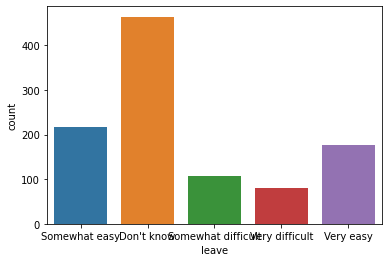

In [209]:
sns.countplot(df.leave)

In [210]:
pd.crosstab(df.leave, df.treatment, normalize='columns') * 100

treatment,No,Yes
leave,,
Don't know,49.250936,39.489194
Somewhat difficult,6.554307,13.948919
Somewhat easy,21.535581,20.039293
Very difficult,5.056180,10.412574
Very easy,17.602996,16.110020


In [211]:
p_value['leave'] = chi2('leave', 'treatment', df)

Ho:  There is no significant assosiation between leave and treatment (No predictability)
Ha:  There is a significant assosiation between leave and treatment (Good predictor)


chi-square stats:  29.97587051759702
p-value:  4.950109465826812e-06


Reject null hypothesis,  There is a significant assosiation between leave and treatment (Good predictor)


In [212]:
# leave is a good predictor

#### mental_health_consequence

In [213]:
desc['mental_health_consequence']

Description    Do you think that discussing a mental health issue with your employer would have negative consequences?
Name: mental_health_consequence, dtype: object

In [214]:
df.mental_health_consequence.describe()

count     1043
unique       3
top         No
freq       422
Name: mental_health_consequence, dtype: object

In [215]:
df.mental_health_consequence.value_counts()

No       422
Maybe    379
Yes      242
Name: mental_health_consequence, dtype: int64

In [216]:
test.mental_health_consequence.value_counts()

Maybe    97
No       65
Yes      48
Name: mental_health_consequence, dtype: int64

<AxesSubplot:xlabel='mental_health_consequence', ylabel='count'>

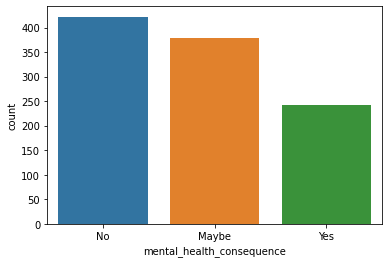

In [217]:
sns.countplot(df.mental_health_consequence)

In [218]:
pd.crosstab(df.mental_health_consequence, df.treatment, normalize='columns') * 100

treatment,No,Yes
mental_health_consequence,,
Maybe,33.895131,38.899804
No,47.940075,32.612967
Yes,18.164794,28.487230


In [219]:
p_value['mental_health_consequence'] = chi2('mental_health_consequence', 'treatment', df)

Ho:  There is no significant assosiation between mental_health_consequence and treatment (No predictability)
Ha:  There is a significant assosiation between mental_health_consequence and treatment (Good predictor)


chi-square stats:  28.894874875348336
p-value:  5.315665487579778e-07


Reject null hypothesis,  There is a significant assosiation between mental_health_consequence and treatment (Good predictor)


In [220]:
# mental health consequence is a good predictor

#### phys_health_consequence

In [221]:
desc['phys_health_consequence']

Description    Do you think that discussing a physical health issue with your employer would have negative consequences?
Name: phys_health_consequence, dtype: object

In [222]:
df.phys_health_consequence.describe()

count     1043
unique       3
top         No
freq       769
Name: phys_health_consequence, dtype: object

In [223]:
df.phys_health_consequence.value_counts()

No       769
Maybe    227
Yes       47
Name: phys_health_consequence, dtype: int64

In [224]:
test.phys_health_consequence.value_counts()

No       151
Maybe     46
Yes       13
Name: phys_health_consequence, dtype: int64

<AxesSubplot:xlabel='phys_health_consequence', ylabel='count'>

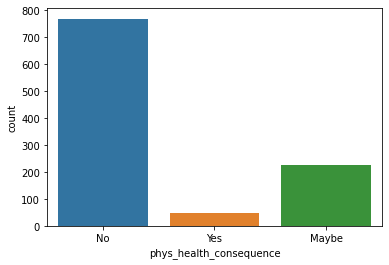

In [225]:
sns.countplot(df.phys_health_consequence)

In [226]:
find_proportion('phys_health_consequence', df)

Proportion of No: 74%
Proportion of Maybe: 22%
Proportion of Yes: 5%


In [227]:
pd.crosstab(df.phys_health_consequence, df.treatment, normalize='columns') * 100

treatment,No,Yes
phys_health_consequence,,
Maybe,20.224719,23.379175
No,76.404494,70.923379
Yes,3.370787,5.697446


In [228]:
p_value['phys_health_consequence'] = chi2('phys_health_consequence', 'treatment', df)

Ho:  There is no significant assosiation between phys_health_consequence and treatment (No predictability)
Ha:  There is a significant assosiation between phys_health_consequence and treatment (Good predictor)


chi-square stats:  5.383929739249858
p-value:  0.06774769312449894


Fail to reject null hypothesis,  There is no significant assosiation between phys_health_consequence and treatment (No predictability)


In [229]:
# phys_health_consequence is not a good predictor

action['drop'].append('phys_health_consequence')

#### coworkers

In [230]:
desc['coworkers']

Description    Would you be willing to discuss a mental health issue with your coworkers?
Name: coworkers, dtype: object

In [231]:
df.coworkers.describe()

count             1043
unique               3
top       Some of them
freq               649
Name: coworkers, dtype: object

In [232]:
df.coworkers.value_counts()

Some of them    649
No              207
Yes             187
Name: coworkers, dtype: int64

In [233]:
test.coworkers.value_counts()

Some of them    122
No               51
Yes              37
Name: coworkers, dtype: int64

<AxesSubplot:xlabel='coworkers', ylabel='count'>

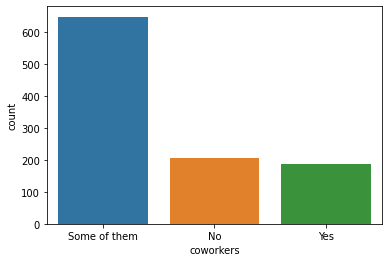

In [234]:
sns.countplot(df.coworkers)

In [235]:
pd.crosstab(df.coworkers, df.treatment, normalize='columns') * 100

treatment,No,Yes
coworkers,,
No,20.973783,18.664047
Some of them,62.546816,61.886051
Yes,16.479401,19.449902


In [236]:
p_value['coworkers'] = chi2('coworkers', 'treatment', df)

Ho:  There is no significant assosiation between coworkers and treatment (No predictability)
Ha:  There is a significant assosiation between coworkers and treatment (Good predictor)


chi-square stats:  2.0013513101448086
p-value:  0.36763096551235397


Fail to reject null hypothesis,  There is no significant assosiation between coworkers and treatment (No predictability)


In [237]:
# coworkers is not a good predictor

action['drop'].append('coworkers')

#### supervisor

In [238]:
desc['supervisor']

Description    Would you be willing to discuss a mental health issue with your direct supervisor(s)?
Name: supervisor, dtype: object

In [239]:
df.supervisor.describe()

count     1043
unique       3
top        Yes
freq       437
Name: supervisor, dtype: object

In [240]:
df.supervisor.value_counts()

Yes             437
No              317
Some of them    289
Name: supervisor, dtype: int64

In [241]:
test.supervisor.value_counts()

Yes             77
No              73
Some of them    60
Name: supervisor, dtype: int64

<AxesSubplot:xlabel='supervisor', ylabel='count'>

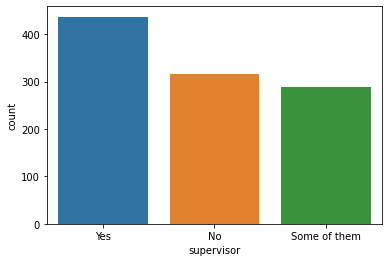

In [242]:
sns.countplot(df.supervisor)

In [243]:
pd.crosstab(df.supervisor, df.treatment, normalize='columns') * 100

treatment,No,Yes
supervisor,,
No,28.277154,32.612967
Some of them,27.340824,28.094303
Yes,44.382022,39.292731


In [244]:
p_value['supervisor'] = chi2('supervisor', 'treatment', df)

Ho:  There is no significant assosiation between supervisor and treatment (No predictability)
Ha:  There is a significant assosiation between supervisor and treatment (Good predictor)


chi-square stats:  3.276293501893299
p-value:  0.19433986894185018


Fail to reject null hypothesis,  There is no significant assosiation between supervisor and treatment (No predictability)


In [245]:
# supervisor is not a good predictor

action['drop'].append('supervisor')

#### mental_health_interview

In [246]:
desc['mental_health_interview']

Description    Would you bring up a mental health issue with a potential employer in an interview?
Name: mental_health_interview, dtype: object

In [247]:
df.mental_health_interview.describe()

count     1043
unique       3
top         No
freq       831
Name: mental_health_interview, dtype: object

In [248]:
df.mental_health_interview.value_counts()

No       831
Maybe    177
Yes       35
Name: mental_health_interview, dtype: int64

In [249]:
test.mental_health_interview.value_counts()

No       172
Maybe     30
Yes        8
Name: mental_health_interview, dtype: int64

<AxesSubplot:xlabel='mental_health_interview', ylabel='count'>

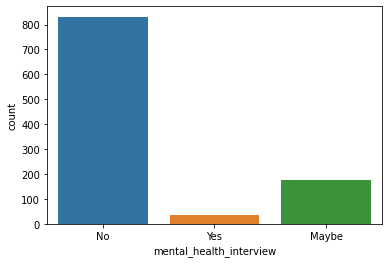

In [250]:
sns.countplot(df.mental_health_interview)

In [251]:
find_proportion('mental_health_interview', df)

Proportion of No: 80%
Proportion of Maybe: 17%
Proportion of Yes: 3%


In [252]:
pd.crosstab(df.mental_health_interview, df.treatment, normalize='columns') * 100

treatment,No,Yes
mental_health_interview,,
Maybe,20.786517,12.966601
No,76.217228,83.300589
Yes,2.996255,3.732809


In [253]:
p_value['mental_health_interview'] = chi2('mental_health_interview', 'treatment', df)

Ho:  There is no significant assosiation between mental_health_interview and treatment (No predictability)
Ha:  There is a significant assosiation between mental_health_interview and treatment (Good predictor)


chi-square stats:  11.452941646716239
p-value:  0.003258556987863


Reject null hypothesis,  There is a significant assosiation between mental_health_interview and treatment (Good predictor)


In [254]:
# There is an association, but p-value is close to 0.05

#### phys_health_interview

In [255]:
desc['phys_health_interview']

Description    Would you bring up a physical health issue with a potential employer in an interview?
Name: phys_health_interview, dtype: object

In [256]:
df.phys_health_interview.describe()

count      1043
unique        3
top       Maybe
freq        460
Name: phys_health_interview, dtype: object

In [257]:
df.phys_health_interview.value_counts()

Maybe    460
No       415
Yes      168
Name: phys_health_interview, dtype: int64

In [258]:
test.phys_health_interview.value_counts()

Maybe    96
No       80
Yes      34
Name: phys_health_interview, dtype: int64

<AxesSubplot:xlabel='phys_health_interview', ylabel='count'>

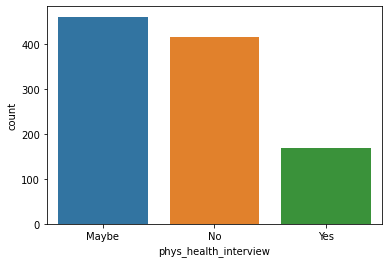

In [259]:
sns.countplot(df.phys_health_interview)

In [260]:
pd.crosstab(df.phys_health_interview, df.treatment, normalize='columns') * 100

treatment,No,Yes
phys_health_interview,,
Maybe,47.940075,40.078585
No,37.827715,41.846758
Yes,14.232210,18.074656


In [261]:
p_value['phys_health_interview'] = chi2('phys_health_interview', 'treatment', df)

Ho:  There is no significant assosiation between phys_health_interview and treatment (No predictability)
Ha:  There is a significant assosiation between phys_health_interview and treatment (Good predictor)


chi-square stats:  7.098481955182959
p-value:  0.02874645057585566


Reject null hypothesis,  There is a significant assosiation between phys_health_interview and treatment (Good predictor)


In [262]:
# There is a significant assosiation, but the p-value is close to 0.05

#### mental_vs_physical

In [263]:
desc['mental_vs_physical']

Description    Do you feel that your employer takes mental health as seriously as physical health?
Name: mental_vs_physical, dtype: object

In [264]:
df.mental_vs_physical.describe()

count           1043
unique             3
top       Don't know
freq             469
Name: mental_vs_physical, dtype: object

In [265]:
df.mental_vs_physical.value_counts()

Don't know    469
Yes           296
No            278
Name: mental_vs_physical, dtype: int64

In [266]:
test.mental_vs_physical.value_counts()

Don't know    105
No             60
Yes            45
Name: mental_vs_physical, dtype: int64

<AxesSubplot:xlabel='mental_vs_physical', ylabel='count'>

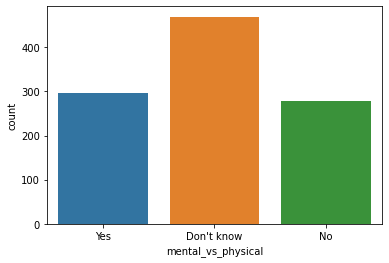

In [267]:
sns.countplot(df.mental_vs_physical)

In [268]:
pd.crosstab(df.mental_vs_physical, df.treatment, normalize='columns') * 100

treatment,No,Yes
mental_vs_physical,,
Don't know,50.187266,39.489194
No,22.097378,31.434185
Yes,27.715356,29.076621


In [269]:
p_value['mental_vs_physical'] = chi2('mental_vs_physical', 'treatment', df)

Ho:  There is no significant assosiation between mental_vs_physical and treatment (No predictability)
Ha:  There is a significant assosiation between mental_vs_physical and treatment (Good predictor)


chi-square stats:  15.32632473743308
p-value:  0.00046981931717449805


Reject null hypothesis,  There is a significant assosiation between mental_vs_physical and treatment (Good predictor)


In [270]:
# mental_vs_physical is a good predictor

#### obs_consequence

In [271]:
desc['obs_consequence']

Description    Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
Name: obs_consequence, dtype: object

In [272]:
df.obs_consequence.describe()

count     1043
unique       2
top         No
freq       898
Name: obs_consequence, dtype: object

In [273]:
df.obs_consequence.value_counts()

No     898
Yes    145
Name: obs_consequence, dtype: int64

In [274]:
test.obs_consequence.value_counts()

No     173
Yes     37
Name: obs_consequence, dtype: int64

<AxesSubplot:xlabel='obs_consequence', ylabel='count'>

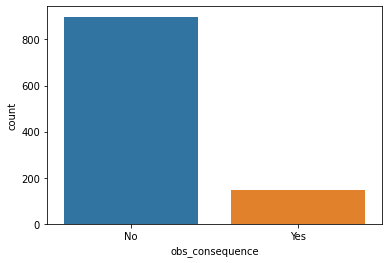

In [275]:
sns.countplot(df.obs_consequence)

In [276]:
pd.crosstab(df.obs_consequence, df.treatment, normalize='columns') * 100

treatment,No,Yes
obs_consequence,,
No,92.134831,79.764244
Yes,7.865169,20.235756


In [277]:
p_value['obs_consequence'] = chi2('obs_consequence', 'treatment', df)

Ho:  There is no significant assosiation between obs_consequence and treatment (No predictability)
Ha:  There is a significant assosiation between obs_consequence and treatment (Good predictor)


chi-square stats:  32.29256323107197
p-value:  1.3261994121163306e-08


Reject null hypothesis,  There is a significant assosiation between obs_consequence and treatment (Good predictor)


In [278]:
# obs_consequence is a good predictor

#### comments

In [279]:
desc['comments']

Description    Any additional notes or comments.
Name: comments, dtype: object

In [280]:
df.comments.isnull().sum()

912

In [281]:
action['drop'].append('comments')

# Preprocessing

In [282]:
action

{'drop': ['S.No',
  'Timestamp',
  'state',
  'self_employed',
  'no_employees',
  'tech_company',
  'phys_health_consequence',
  'coworkers',
  'supervisor',
  'comments']}

In [283]:
action['drop'].append('treatment')

In [284]:
dict1 = p_value
sorted_dict = {}
sorted_keys = sorted(dict1, key=dict1.get)

for w in sorted_keys:
    sorted_dict[w] = dict1[w]

sorted_dict

{'work_interfere': 4.352830219132e-106,
 'Gender': 2.3788616385396698e-83,
 'family_history': 3.432259316054486e-35,
 'care_options': 1.0850561436450189e-16,
 'benefits': 2.56497198861586e-12,
 'obs_consequence': 1.3261994121163306e-08,
 'mental_health_consequence': 5.315665487579778e-07,
 'leave': 4.950109465826812e-06,
 'anonymity': 1.3337960735626316e-05,
 'mental_vs_physical': 0.00046981931717449805,
 'Country': 0.0005205517192911775,
 'mental_health_interview': 0.003258556987863,
 'seek_help': 0.00383863732979991,
 'Age': 0.004189746365937874,
 'wellness_program': 0.008288172227484888,
 'phys_health_interview': 0.02874645057585566,
 'phys_health_consequence': 0.06774769312449894,
 'state': 0.08416808868755185,
 'no_employees': 0.158747911852401,
 'supervisor': 0.19433986894185018,
 'tech_company': 0.2081873674069063,
 'remote_work': 0.2947821207739679,
 'coworkers': 0.36763096551235397,
 'self_employed': 0.7770794838173412}

In [285]:
test.shape

(210, 27)

In [286]:
action['drop'].remove('treatment')
action['drop']

['S.No',
 'Timestamp',
 'state',
 'self_employed',
 'no_employees',
 'tech_company',
 'phys_health_consequence',
 'coworkers',
 'supervisor',
 'comments']

In [287]:
test = test.drop(action['drop'], axis=1)

In [288]:
action['drop'].append('treatment')

In [289]:
df.shape

(1043, 28)

## train test split

In [501]:
X = df.drop(action['drop'], axis=1)
y = df['treatment']

In [502]:
X.shape

(1043, 17)

In [503]:
y.shape

(1043,)

In [293]:
X.head()

,Age,Gender,Country,family_history,work_interfere,remote_work,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,No,Often,No,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Maybe,Yes,No
1,44,Male,United States,No,Rarely,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,Don't know,No
2,32,Male,Canada,No,Rarely,No,No,No,No,No,Don't know,Somewhat difficult,No,Yes,Yes,No,No
3,31,Male,United Kingdom,Yes,Often,No,No,Yes,No,No,No,Somewhat difficult,Yes,Maybe,Maybe,No,Yes
4,31,Male,United States,No,Never,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,Yes,Yes,Don't know,No


In [294]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [295]:
X_train.shape

(730, 17)

In [296]:
y_train.shape

(730,)

In [297]:
X_test.shape

(313, 17)

In [298]:
y_test.shape

(313,)

## Scaling and Encoding

In [299]:
num_cols = [col for col in X_train.columns if X_train[col].dtypes != 'O']
num_cols

['Age']

In [300]:
cat_cols = [col for col in X_train.columns if X_train[col].dtypes == 'O']
cat_cols

['Gender',
 'Country',
 'family_history',
 'work_interfere',
 'remote_work',
 'benefits',
 'care_options',
 'wellness_program',
 'seek_help',
 'anonymity',
 'leave',
 'mental_health_consequence',
 'mental_health_interview',
 'phys_health_interview',
 'mental_vs_physical',
 'obs_consequence']

In [301]:
len(cat_cols) + len(num_cols) == len(X_train.columns)

True

In [302]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [303]:
ct = ColumnTransformer([
    ('scaling', StandardScaler(), num_cols),
    ('encoding', OneHotEncoder(drop='first', sparse=False), cat_cols)
])

In [304]:
X_train_new = ct.fit_transform(X_train)

In [305]:
X_test_new = ct.transform(X_test)

In [306]:
test_new = ct.transform(test)

In [307]:
X_train_new.shape

(730, 35)

In [308]:
X_test_new.shape

(313, 35)

In [309]:
test_new.shape

(210, 35)

In [310]:
y_train.shape

(730,)

In [311]:
y_test.shape

(313,)

# Model 1: Logistic Regression

In [312]:
from sklearn.linear_model import LogisticRegression

In [313]:
model1 = LogisticRegression()

In [314]:
model1.fit(X_train_new, y_train)

LogisticRegression()

In [315]:
y_pred = model1.predict(X_test_new)

In [316]:
y_pred_proba = model1.predict_proba(X_test_new)

### Model evaluation

In [317]:
from sklearn.metrics import accuracy_score, classification_report, f1_score

In [318]:
accuracy_score(y_test, y_pred)

0.8306709265175719

In [319]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.86      0.79      0.82       156
         Yes       0.81      0.87      0.84       157

    accuracy                           0.83       313
   macro avg       0.83      0.83      0.83       313
weighted avg       0.83      0.83      0.83       313



In [320]:
f1_score(y_test, y_pred, pos_label='Yes')

0.836923076923077

# Model 2: Random Forest Classifier

In [321]:
from sklearn.ensemble import RandomForestClassifier

In [322]:
model2 = RandomForestClassifier(n_estimators=500)

In [323]:
model2.fit(X_train_new, y_train)

RandomForestClassifier(n_estimators=500)

In [324]:
y_pred = model2.predict(X_test_new)

### Model evaluation

In [325]:
accuracy_score(y_test, y_pred)

0.8370607028753994

In [326]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.86      0.81      0.83       156
         Yes       0.82      0.87      0.84       157

    accuracy                           0.84       313
   macro avg       0.84      0.84      0.84       313
weighted avg       0.84      0.84      0.84       313



In [327]:
f1_score(y_test, y_pred, pos_label='Yes')

0.8421052631578947

# Model3: Support Vector Machines

In [328]:
from sklearn.svm import SVC

In [329]:
model3 = SVC()

In [330]:
model3.fit(X_train_new, y_train)

SVC()

In [331]:
y_pred = model3.predict(X_test_new)

In [332]:
y_pred

array(['Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No',
       'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No',
       'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
       'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
       'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No',
       'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No',
       'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No',
       'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No',
       'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes',
       'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Ye

### Model evaluation

In [333]:
accuracy_score(y_test, y_pred)

0.8338658146964856

In [334]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.87      0.78      0.82       156
         Yes       0.80      0.89      0.84       157

    accuracy                           0.83       313
   macro avg       0.84      0.83      0.83       313
weighted avg       0.84      0.83      0.83       313



In [335]:
f1_score(y_test, y_pred, pos_label='Yes')

0.8424242424242425

#### predicting final test

In [336]:
y_pred_fin1 = model3.predict(test_new)

In [337]:
y_pred_fin1

array(['Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No',
       'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes',
       'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes',
       'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes',
       'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No'

In [338]:
sample1 = pd.read_csv('sample.csv')
sample1.head()

,S.No,treatment
0,1,Yes
1,2,No
2,3,Yes
3,4,No
4,5,No


In [339]:
sample1['treatment '] = y_pred_fin1

In [340]:
sample1.head()

,S.No,treatment
0,1,Yes
1,2,Yes
2,3,Yes
3,4,No
4,5,No


In [341]:
sample1.to_csv('files/sample.csv', index=False)

# Second attempt

## Model4 : SVM with grid search

In [342]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [343]:
param_grid = {'C': [0.1,1, 10, 100], 
              'gamma': [1,0.1,0.01,0.001],
              'kernel': ['rbf', 'poly', 'sigmoid']}

In [344]:
grid_svc = GridSearchCV(SVC(), param_grid, refit = True, verbose = 2)

In [345]:
grid_svc.fit(X_train_new, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...................

[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ..................C=100, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=100, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [346]:
grid_svc.best_estimator_

SVC(C=1, gamma=0.1)

In [347]:
y_pred = grid_svc.predict(X_test_new)

### Model evaluation

In [348]:
accuracy_score(y_test, y_pred)

0.8306709265175719

In [349]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.88      0.76      0.82       156
         Yes       0.79      0.90      0.84       157

    accuracy                           0.83       313
   macro avg       0.84      0.83      0.83       313
weighted avg       0.84      0.83      0.83       313



In [350]:
f1_score(y_test, y_pred, pos_label='Yes')

0.8417910447761194

## Model 5: KNN

In [351]:
from sklearn.neighbors import KNeighborsClassifier

In [352]:
model5 = KNeighborsClassifier()

In [353]:
model5.fit(X_train_new, y_train)

KNeighborsClassifier()

In [354]:
y_pred = model5.predict(X_test_new)

#### Model evaluation

In [355]:
accuracy_score(y_test, y_pred)

0.7507987220447284

In [356]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.71      0.85      0.77       156
         Yes       0.82      0.65      0.72       157

    accuracy                           0.75       313
   macro avg       0.76      0.75      0.75       313
weighted avg       0.76      0.75      0.75       313



# Other models

In [357]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

## XGB Classifier

In [358]:
xgb = XGBClassifier()

In [359]:
xgb.fit(X_train_new, y_train)

[20:30:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [360]:
y_pred = xgb.predict(X_test_new)

#### Model Evaluation

In [361]:
accuracy_score(y_test, y_pred)

0.8019169329073482

In [362]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.81      0.79      0.80       156
         Yes       0.80      0.82      0.81       157

    accuracy                           0.80       313
   macro avg       0.80      0.80      0.80       313
weighted avg       0.80      0.80      0.80       313



## Cat Boost Classifier

In [363]:
cat = CatBoostClassifier()

In [364]:
cat.fit(X_train_new, y_train)

Learning rate set to 0.009007
0:	learn: 0.6882757	total: 246ms	remaining: 4m 5s
1:	learn: 0.6821656	total: 268ms	remaining: 2m 13s
2:	learn: 0.6760130	total: 272ms	remaining: 1m 30s
3:	learn: 0.6701138	total: 275ms	remaining: 1m 8s
4:	learn: 0.6642856	total: 280ms	remaining: 55.6s
5:	learn: 0.6574465	total: 285ms	remaining: 47.2s
6:	learn: 0.6499041	total: 289ms	remaining: 41s
7:	learn: 0.6442556	total: 293ms	remaining: 36.3s
8:	learn: 0.6388259	total: 297ms	remaining: 32.7s
9:	learn: 0.6339222	total: 301ms	remaining: 29.8s
10:	learn: 0.6296009	total: 303ms	remaining: 27.3s
11:	learn: 0.6240413	total: 310ms	remaining: 25.5s
12:	learn: 0.6190162	total: 313ms	remaining: 23.8s
13:	learn: 0.6145533	total: 322ms	remaining: 22.7s
14:	learn: 0.6110952	total: 326ms	remaining: 21.4s
15:	learn: 0.6069924	total: 330ms	remaining: 20.3s
16:	learn: 0.6009189	total: 334ms	remaining: 19.3s
17:	learn: 0.5948948	total: 337ms	remaining: 18.4s
18:	learn: 0.5910019	total: 341ms	remaining: 17.6s
19:	learn: 

186:	learn: 0.3672240	total: 1.09s	remaining: 4.73s
187:	learn: 0.3669486	total: 1.09s	remaining: 4.72s
188:	learn: 0.3665689	total: 1.1s	remaining: 4.71s
189:	learn: 0.3659800	total: 1.1s	remaining: 4.7s
190:	learn: 0.3655142	total: 1.1s	remaining: 4.68s
191:	learn: 0.3649565	total: 1.11s	remaining: 4.67s
192:	learn: 0.3641216	total: 1.11s	remaining: 4.67s
193:	learn: 0.3635764	total: 1.12s	remaining: 4.65s
194:	learn: 0.3631680	total: 1.12s	remaining: 4.64s
195:	learn: 0.3629114	total: 1.13s	remaining: 4.63s
196:	learn: 0.3625314	total: 1.13s	remaining: 4.61s
197:	learn: 0.3619206	total: 1.13s	remaining: 4.59s
198:	learn: 0.3615480	total: 1.14s	remaining: 4.58s
199:	learn: 0.3611888	total: 1.14s	remaining: 4.58s
200:	learn: 0.3606307	total: 1.15s	remaining: 4.56s
201:	learn: 0.3603521	total: 1.15s	remaining: 4.54s
202:	learn: 0.3600681	total: 1.15s	remaining: 4.53s
203:	learn: 0.3596675	total: 1.16s	remaining: 4.52s
204:	learn: 0.3591222	total: 1.16s	remaining: 4.51s
205:	learn: 0.35

361:	learn: 0.3030214	total: 1.92s	remaining: 3.39s
362:	learn: 0.3027743	total: 1.93s	remaining: 3.38s
363:	learn: 0.3023572	total: 1.93s	remaining: 3.38s
364:	learn: 0.3021659	total: 1.94s	remaining: 3.37s
365:	learn: 0.3018516	total: 1.94s	remaining: 3.36s
366:	learn: 0.3015098	total: 1.95s	remaining: 3.35s
367:	learn: 0.3012981	total: 1.95s	remaining: 3.35s
368:	learn: 0.3009237	total: 1.96s	remaining: 3.34s
369:	learn: 0.3006862	total: 1.96s	remaining: 3.33s
370:	learn: 0.3003427	total: 1.96s	remaining: 3.33s
371:	learn: 0.2999898	total: 1.97s	remaining: 3.32s
372:	learn: 0.2998476	total: 1.97s	remaining: 3.31s
373:	learn: 0.2995135	total: 1.97s	remaining: 3.31s
374:	learn: 0.2992478	total: 1.98s	remaining: 3.3s
375:	learn: 0.2990163	total: 1.98s	remaining: 3.29s
376:	learn: 0.2987975	total: 1.99s	remaining: 3.29s
377:	learn: 0.2986335	total: 1.99s	remaining: 3.28s
378:	learn: 0.2983357	total: 2s	remaining: 3.27s
379:	learn: 0.2980893	total: 2s	remaining: 3.26s
380:	learn: 0.29775

528:	learn: 0.2602745	total: 2.77s	remaining: 2.47s
529:	learn: 0.2601663	total: 2.78s	remaining: 2.46s
530:	learn: 0.2598143	total: 2.78s	remaining: 2.46s
531:	learn: 0.2595538	total: 2.78s	remaining: 2.45s
532:	learn: 0.2593742	total: 2.79s	remaining: 2.44s
533:	learn: 0.2592335	total: 2.79s	remaining: 2.44s
534:	learn: 0.2587603	total: 2.79s	remaining: 2.43s
535:	learn: 0.2585343	total: 2.8s	remaining: 2.42s
536:	learn: 0.2582296	total: 2.8s	remaining: 2.42s
537:	learn: 0.2581102	total: 2.8s	remaining: 2.41s
538:	learn: 0.2577676	total: 2.81s	remaining: 2.4s
539:	learn: 0.2575034	total: 2.81s	remaining: 2.4s
540:	learn: 0.2573446	total: 2.81s	remaining: 2.39s
541:	learn: 0.2571250	total: 2.82s	remaining: 2.38s
542:	learn: 0.2569313	total: 2.82s	remaining: 2.38s
543:	learn: 0.2566643	total: 2.83s	remaining: 2.37s
544:	learn: 0.2563985	total: 2.83s	remaining: 2.36s
545:	learn: 0.2561663	total: 2.83s	remaining: 2.35s
546:	learn: 0.2559073	total: 2.84s	remaining: 2.35s
547:	learn: 0.255

697:	learn: 0.2252217	total: 3.83s	remaining: 1.66s
698:	learn: 0.2250530	total: 3.84s	remaining: 1.65s
699:	learn: 0.2249520	total: 3.85s	remaining: 1.65s
700:	learn: 0.2247043	total: 3.85s	remaining: 1.64s
701:	learn: 0.2245408	total: 3.86s	remaining: 1.64s
702:	learn: 0.2243898	total: 3.86s	remaining: 1.63s
703:	learn: 0.2242350	total: 3.87s	remaining: 1.63s
704:	learn: 0.2239825	total: 3.87s	remaining: 1.62s
705:	learn: 0.2238258	total: 3.87s	remaining: 1.61s
706:	learn: 0.2236639	total: 3.88s	remaining: 1.61s
707:	learn: 0.2234677	total: 3.88s	remaining: 1.6s
708:	learn: 0.2233858	total: 3.88s	remaining: 1.59s
709:	learn: 0.2230460	total: 3.88s	remaining: 1.59s
710:	learn: 0.2228914	total: 3.89s	remaining: 1.58s
711:	learn: 0.2225849	total: 3.89s	remaining: 1.57s
712:	learn: 0.2224094	total: 3.89s	remaining: 1.57s
713:	learn: 0.2222110	total: 3.9s	remaining: 1.56s
714:	learn: 0.2220963	total: 3.9s	remaining: 1.55s
715:	learn: 0.2219993	total: 3.9s	remaining: 1.55s
716:	learn: 0.22

866:	learn: 0.1919697	total: 4.67s	remaining: 716ms
867:	learn: 0.1918288	total: 4.67s	remaining: 710ms
868:	learn: 0.1915841	total: 4.67s	remaining: 705ms
869:	learn: 0.1913886	total: 4.68s	remaining: 699ms
870:	learn: 0.1912621	total: 4.68s	remaining: 693ms
871:	learn: 0.1910590	total: 4.69s	remaining: 688ms
872:	learn: 0.1907921	total: 4.69s	remaining: 682ms
873:	learn: 0.1906180	total: 4.69s	remaining: 677ms
874:	learn: 0.1904851	total: 4.7s	remaining: 671ms
875:	learn: 0.1902254	total: 4.7s	remaining: 665ms
876:	learn: 0.1899944	total: 4.7s	remaining: 660ms
877:	learn: 0.1897230	total: 4.71s	remaining: 654ms
878:	learn: 0.1895163	total: 4.71s	remaining: 649ms
879:	learn: 0.1893106	total: 4.71s	remaining: 643ms
880:	learn: 0.1890225	total: 4.72s	remaining: 637ms
881:	learn: 0.1889220	total: 4.72s	remaining: 632ms
882:	learn: 0.1886982	total: 4.72s	remaining: 626ms
883:	learn: 0.1885549	total: 4.73s	remaining: 620ms
884:	learn: 0.1884351	total: 4.73s	remaining: 615ms
885:	learn: 0.1

In [365]:
y_pred = cat.predict(X_test_new)

#### Model Evaluation

In [366]:
accuracy_score(y_test, y_pred)

0.8274760383386581

In [367]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.85      0.79      0.82       156
         Yes       0.80      0.87      0.83       157

    accuracy                           0.83       313
   macro avg       0.83      0.83      0.83       313
weighted avg       0.83      0.83      0.83       313



In [368]:
f1_score(y_test, y_pred, pos_label='Yes')

0.834355828220859

## LGBM Classifier

In [369]:
lgbm = LGBMClassifier()

In [370]:
lgbm.fit(X_train_new, y_train)

LGBMClassifier()

In [371]:
y_pred = lgbm.predict(X_test_new)

#### Model Evaluation

In [372]:
accuracy_score(y_test, y_pred)

0.8178913738019169

In [373]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.84      0.78      0.81       156
         Yes       0.80      0.85      0.82       157

    accuracy                           0.82       313
   macro avg       0.82      0.82      0.82       313
weighted avg       0.82      0.82      0.82       313



In [374]:
f1_score(y_test, y_pred, pos_label='Yes')

0.8246153846153846

## XGB Classifier with hyperparameters

In [375]:
xgb_hp = XGBClassifier(learning_rate =0.1,
                       n_estimators=494,
                       max_depth=5,
                       subsample = 0.70,
                       verbosity = 0,
                       scale_pos_weight = 2.5,
                       updater ="grow_histmaker",
                       base_score  = 0.2)

In [376]:
xgb_hp.fit(X_train_new, y_train)

XGBClassifier(base_score=0.2, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=494, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=2.5, subsample=0.7,
              tree_method='auto', updater='grow_histmaker',
              validate_parameters=1, verbosity=0)

In [377]:
y_pred = xgb_hp.predict(X_test_new)

#### Model Evaluation

In [378]:
accuracy_score(y_test, y_pred)

0.8019169329073482

In [379]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.83      0.76      0.79       156
         Yes       0.78      0.84      0.81       157

    accuracy                           0.80       313
   macro avg       0.80      0.80      0.80       313
weighted avg       0.80      0.80      0.80       313



## Cat Boost Classifier with hyperparameters

In [380]:
cat_hp = CatBoostClassifier(learning_rate=0.15,
                             n_estimators=494,
                             subsample=0.085,
                             max_depth=5,
                             scale_pos_weight=2.5)

In [381]:
cat_hp.fit(X_train_new, y_train)

0:	learn: 0.6399814	total: 2.6ms	remaining: 1.28s
1:	learn: 0.5996106	total: 5.41ms	remaining: 1.33s
2:	learn: 0.5735770	total: 7.64ms	remaining: 1.25s
3:	learn: 0.5072049	total: 10.1ms	remaining: 1.24s
4:	learn: 0.4791199	total: 13.1ms	remaining: 1.28s
5:	learn: 0.4652061	total: 15.4ms	remaining: 1.25s
6:	learn: 0.4502005	total: 18.8ms	remaining: 1.31s
7:	learn: 0.4404317	total: 38.8ms	remaining: 2.35s
8:	learn: 0.4289634	total: 42.4ms	remaining: 2.28s
9:	learn: 0.4194048	total: 45.4ms	remaining: 2.19s
10:	learn: 0.4052204	total: 47.9ms	remaining: 2.1s
11:	learn: 0.3980528	total: 50.3ms	remaining: 2.02s
12:	learn: 0.3870081	total: 52.5ms	remaining: 1.94s
13:	learn: 0.3778319	total: 55.1ms	remaining: 1.89s
14:	learn: 0.3733792	total: 57.4ms	remaining: 1.83s
15:	learn: 0.3713428	total: 59.5ms	remaining: 1.78s
16:	learn: 0.3684541	total: 61.7ms	remaining: 1.73s
17:	learn: 0.3660077	total: 63.9ms	remaining: 1.69s
18:	learn: 0.3602491	total: 66.3ms	remaining: 1.66s
19:	learn: 0.3550110	tot

166:	learn: 0.1302873	total: 493ms	remaining: 966ms
167:	learn: 0.1292189	total: 496ms	remaining: 962ms
168:	learn: 0.1289549	total: 498ms	remaining: 958ms
169:	learn: 0.1280489	total: 501ms	remaining: 954ms
170:	learn: 0.1270768	total: 503ms	remaining: 951ms
171:	learn: 0.1266662	total: 506ms	remaining: 947ms
172:	learn: 0.1264489	total: 508ms	remaining: 943ms
173:	learn: 0.1259968	total: 511ms	remaining: 939ms
174:	learn: 0.1255792	total: 513ms	remaining: 935ms
175:	learn: 0.1245631	total: 516ms	remaining: 932ms
176:	learn: 0.1239084	total: 518ms	remaining: 927ms
177:	learn: 0.1233426	total: 520ms	remaining: 924ms
178:	learn: 0.1224959	total: 523ms	remaining: 920ms
179:	learn: 0.1222381	total: 525ms	remaining: 916ms
180:	learn: 0.1218213	total: 527ms	remaining: 912ms
181:	learn: 0.1209049	total: 530ms	remaining: 909ms
182:	learn: 0.1203975	total: 533ms	remaining: 905ms
183:	learn: 0.1200634	total: 535ms	remaining: 901ms
184:	learn: 0.1195212	total: 537ms	remaining: 898ms
185:	learn: 

351:	learn: 0.0549331	total: 984ms	remaining: 397ms
352:	learn: 0.0545930	total: 987ms	remaining: 394ms
353:	learn: 0.0543287	total: 990ms	remaining: 391ms
354:	learn: 0.0540303	total: 992ms	remaining: 388ms
355:	learn: 0.0536832	total: 995ms	remaining: 386ms
356:	learn: 0.0536072	total: 997ms	remaining: 383ms
357:	learn: 0.0533382	total: 1s	remaining: 380ms
358:	learn: 0.0529765	total: 1s	remaining: 377ms
359:	learn: 0.0528577	total: 1s	remaining: 374ms
360:	learn: 0.0527224	total: 1.01s	remaining: 371ms
361:	learn: 0.0526880	total: 1.01s	remaining: 368ms
362:	learn: 0.0525309	total: 1.01s	remaining: 365ms
363:	learn: 0.0522846	total: 1.01s	remaining: 363ms
364:	learn: 0.0518888	total: 1.02s	remaining: 360ms
365:	learn: 0.0516278	total: 1.02s	remaining: 357ms
366:	learn: 0.0515646	total: 1.02s	remaining: 354ms
367:	learn: 0.0513423	total: 1.02s	remaining: 351ms
368:	learn: 0.0509068	total: 1.03s	remaining: 348ms
369:	learn: 0.0507591	total: 1.03s	remaining: 345ms
370:	learn: 0.0502952

In [382]:
y_pred = cat_hp.predict(X_test_new)

#### Model Evaluation

In [383]:
accuracy_score(y_test, y_pred)

0.8338658146964856

In [384]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.87      0.79      0.83       156
         Yes       0.81      0.88      0.84       157

    accuracy                           0.83       313
   macro avg       0.84      0.83      0.83       313
weighted avg       0.84      0.83      0.83       313



In [385]:
f1_score(y_test, y_pred, pos_label='Yes')

0.8414634146341463

## LGBM Classifier with hyperparameters

In [386]:
lgbm_hp = LGBMClassifier(subsample_freq = 2,
                         objective ="binary",
                         importance_type = "gain",
                         verbosity = -1,
                         max_bin = 60,
                         num_leaves = 300,
                         boosting_type = 'dart',
                         learning_rate=0.15,
                         n_estimators=494,
                         max_depth=5,
                         scale_pos_weight=2.5)

In [387]:
lgbm_hp.fit(X_train_new, y_train)

LGBMClassifier(boosting_type='dart', importance_type='gain', learning_rate=0.15,
               max_bin=60, max_depth=5, n_estimators=494, num_leaves=300,
               objective='binary', scale_pos_weight=2.5, subsample_freq=2,
               verbosity=-1)

In [388]:
y_pred = lgbm_hp.predict(X_test_new)

#### Model Evaluation

In [389]:
accuracy_score(y_test, y_pred)

0.8115015974440895

In [390]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.84      0.76      0.80       156
         Yes       0.78      0.86      0.82       157

    accuracy                           0.81       313
   macro avg       0.81      0.81      0.81       313
weighted avg       0.81      0.81      0.81       313



In [391]:
f1_score(y_test, y_pred, pos_label='Yes')

0.8206686930091184

In [392]:
# Lets try one neural network

## Neural Network

In [393]:
#Dependencies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [446]:
X_new_nn = X_new.copy()

In [447]:
X_new_nn.shape

(1043, 35)

In [448]:
y_nn = y.replace({'Yes':1, 'No':0})

In [449]:
# Neural network
model = Sequential()
model.add(Dense(16, input_dim=35, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [450]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [451]:
history = model.fit(X_new_nn, y_nn, epochs=100, batch_size=64)

Epoch 1/100
17/17 [==============================] - 1s 2ms/step - loss: 0.7214 - accuracy: 0.4320
Epoch 2/100
17/17 [==============================] - 0s 1ms/step - loss: 0.6941 - accuracy: 0.5107
Epoch 3/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6808 - accuracy: 0.5528
Epoch 4/100
17/17 [==============================] - 0s 1ms/step - loss: 0.6590 - accuracy: 0.6433
Epoch 5/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6395 - accuracy: 0.6780
Epoch 6/100
17/17 [==============================] - 0s 1ms/step - loss: 0.6117 - accuracy: 0.7286
Epoch 7/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5927 - accuracy: 0.7109
Epoch 8/100
17/17 [==============================] - 0s 1ms/step - loss: 0.5728 - accuracy: 0.7472
Epoch 9/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5535 - accuracy: 0.7624
Epoch 10/100
17/17 [==============================] - 0s 1ms/step - loss: 0.5254 - accuracy: 0.7728
Epoch 11/

17/17 [==============================] - 0s 2ms/step - loss: 0.2777 - accuracy: 0.8820
Epoch 84/100
17/17 [==============================] - 0s 3ms/step - loss: 0.2665 - accuracy: 0.8871
Epoch 85/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2714 - accuracy: 0.8778
Epoch 86/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2556 - accuracy: 0.8894
Epoch 87/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2595 - accuracy: 0.8911
Epoch 88/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2661 - accuracy: 0.8863
Epoch 89/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2613 - accuracy: 0.8839
Epoch 90/100
17/17 [==============================] - 0s 3ms/step - loss: 0.2718 - accuracy: 0.8896
Epoch 91/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2610 - accuracy: 0.8886
Epoch 92/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2517 - accuracy: 0.8988
Epoch 93/100


In [456]:
y_pred = model.predict(test_new)

In [461]:
y_pred_nn = []
for i in y_pred:
    if i>0.5:
        y_pred_nn.append('Yes')
    else:
        y_pred_nn.append('No')

In [462]:
y_pred_nn

['Yes',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'No',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'No',
 'No',
 'No',
 'Yes',
 'No',
 'Yes',
 'No',
 'No',
 'Yes',
 'No',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'No',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'No',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'No',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'No',
 'Yes',
 'No',
 'No',
 'Yes',
 'Yes',
 'No',
 'No',
 'Yes',
 'Yes',
 'No',
 'No',
 'No',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'No',
 'No',
 'Yes',
 'No',
 'Yes',
 'No',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'No',
 'Yes',
 'No',
 'No',
 'Yes',
 'Yes',
 'No',
 'No',
 'Yes',
 'No',
 'No',
 'No',
 'Yes',

In [463]:
sample5 = sample1
sample5.head()

,S.No,treatment
0,1,Yes
1,2,Yes
2,3,Yes
3,4,Yes
4,5,No


In [464]:
sample5['treatment '] = y_pred_nn

In [466]:
sample5.to_csv('files/sample.csv', index=False)

---

In [408]:
df.head()

,S.No,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,1,2014-08-27 11:29:31,37,Female,United States,IL,No,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2,2014-08-27 11:29:37,44,Male,United States,IN,No,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,3,2014-08-27 11:29:44,32,Male,Canada,NaN,No,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,4,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,No,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,5,2014-08-27 11:30:22,31,Male,United States,TX,No,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [409]:
df[df.comments.notnull()]['treatment'].value_counts()

Yes    79
No     52
Name: treatment, dtype: int64

In [410]:
X.head()

,Age,Gender,Country,family_history,work_interfere,remote_work,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,No,Often,No,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Maybe,Yes,No
1,44,Male,United States,No,Rarely,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,Don't know,No
2,32,Male,Canada,No,Rarely,No,No,No,No,No,Don't know,Somewhat difficult,No,Yes,Yes,No,No
3,31,Male,United Kingdom,Yes,Often,No,No,Yes,No,No,No,Somewhat difficult,Yes,Maybe,Maybe,No,Yes
4,31,Male,United States,No,Never,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,Yes,Yes,Don't know,No


In [411]:
y.head()

0    Yes
1     No
2     No
3    Yes
4     No
Name: treatment, dtype: object

In [412]:
test.head()

,Age,Gender,Country,family_history,work_interfere,remote_work,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,39,Male,United Kingdom,Yes,Sometimes,Yes,No,Yes,Yes,Yes,Yes,Somewhat difficult,No,No,Maybe,Yes,Yes
1,26,Female,United States,Yes,Sometimes,No,Yes,Yes,No,No,Don't know,Don't know,No,No,Maybe,No,Yes
2,23,Female,United States,Yes,Sometimes,No,No,No,No,No,Don't know,Somewhat difficult,Yes,No,Maybe,No,No
3,35,Male,Other,Yes,Often,No,Don't know,Not sure,No,No,Yes,Very easy,No,No,Maybe,No,No
4,36,Male,United States,No,Never,Yes,Don't know,Not sure,Don't know,Don't know,Don't know,Very easy,No,No,No,Don't know,No


In [413]:
ct2 = ColumnTransformer([
    ('scaling', StandardScaler(), num_cols),
    ('encoding', OneHotEncoder(drop='first', sparse=True), cat_cols)
])

In [414]:
X_new = ct2.fit_transform(X)
test_new = ct2.transform(test)

In [572]:
model3_svc = SVC()

In [573]:
model3_svc.fit(X_new, y)

SVC()

In [574]:
y_pred = model3_svc.predict(test_new)

In [575]:
y_pred

array(['Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No',
       'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes',
       'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes',
       'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes',
       'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes',
       'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes'

In [576]:
sample2 = pd.read_csv('sample.csv')

In [577]:
sample2['treatment '] = y_pred

In [578]:
sample2.head()

,S.No,treatment
0,1,Yes
1,2,Yes
2,3,Yes
3,4,Yes
4,5,No


In [579]:
sample2.to_csv('files/sample.csv', index=False)

In [561]:
cat_hp2 = CatBoostClassifier(learning_rate=0.15,
                             n_estimators=494,
                             subsample=0.085,
                             max_depth=5,
                             scale_pos_weight=2.5)

In [562]:
X_new.shape

(1043, 35)

In [563]:
test_new.shape

(210, 35)

In [564]:
cat_hp2.fit(X_new, y)

0:	learn: 0.6450035	total: 30.4ms	remaining: 15s
1:	learn: 0.5803397	total: 33.6ms	remaining: 8.27s
2:	learn: 0.5448696	total: 36.4ms	remaining: 5.96s
3:	learn: 0.4829016	total: 39.4ms	remaining: 4.82s
4:	learn: 0.4673427	total: 42.1ms	remaining: 4.12s
5:	learn: 0.4304930	total: 44.7ms	remaining: 3.63s
6:	learn: 0.4162486	total: 47.2ms	remaining: 3.28s
7:	learn: 0.3986555	total: 49.8ms	remaining: 3.03s
8:	learn: 0.3935271	total: 52.3ms	remaining: 2.82s
9:	learn: 0.3835272	total: 54.9ms	remaining: 2.65s
10:	learn: 0.3667716	total: 57.4ms	remaining: 2.52s
11:	learn: 0.3634114	total: 60ms	remaining: 2.41s
12:	learn: 0.3569872	total: 62.5ms	remaining: 2.31s
13:	learn: 0.3516285	total: 65.1ms	remaining: 2.23s
14:	learn: 0.3494230	total: 67.5ms	remaining: 2.15s
15:	learn: 0.3468272	total: 70.1ms	remaining: 2.09s
16:	learn: 0.3422574	total: 72.8ms	remaining: 2.04s
17:	learn: 0.3411635	total: 75.3ms	remaining: 1.99s
18:	learn: 0.3379981	total: 77.7ms	remaining: 1.94s
19:	learn: 0.3344315	total

173:	learn: 0.1468996	total: 513ms	remaining: 944ms
174:	learn: 0.1465390	total: 517ms	remaining: 942ms
175:	learn: 0.1452841	total: 520ms	remaining: 940ms
176:	learn: 0.1447948	total: 523ms	remaining: 936ms
177:	learn: 0.1443486	total: 634ms	remaining: 1.13s
178:	learn: 0.1439820	total: 643ms	remaining: 1.13s
179:	learn: 0.1432311	total: 652ms	remaining: 1.14s
180:	learn: 0.1427303	total: 660ms	remaining: 1.14s
181:	learn: 0.1423924	total: 669ms	remaining: 1.15s
182:	learn: 0.1418143	total: 677ms	remaining: 1.15s
183:	learn: 0.1408995	total: 691ms	remaining: 1.16s
184:	learn: 0.1407017	total: 697ms	remaining: 1.16s
185:	learn: 0.1401055	total: 702ms	remaining: 1.16s
186:	learn: 0.1397782	total: 710ms	remaining: 1.17s
187:	learn: 0.1393991	total: 714ms	remaining: 1.16s
188:	learn: 0.1387658	total: 718ms	remaining: 1.16s
189:	learn: 0.1378807	total: 726ms	remaining: 1.16s
190:	learn: 0.1373412	total: 729ms	remaining: 1.16s
191:	learn: 0.1368147	total: 733ms	remaining: 1.15s
192:	learn: 

350:	learn: 0.0754505	total: 1.18s	remaining: 481ms
351:	learn: 0.0753710	total: 1.18s	remaining: 478ms
352:	learn: 0.0752416	total: 1.19s	remaining: 474ms
353:	learn: 0.0749937	total: 1.19s	remaining: 471ms
354:	learn: 0.0749162	total: 1.19s	remaining: 467ms
355:	learn: 0.0746974	total: 1.2s	remaining: 464ms
356:	learn: 0.0745074	total: 1.2s	remaining: 460ms
357:	learn: 0.0742300	total: 1.2s	remaining: 456ms
358:	learn: 0.0738361	total: 1.2s	remaining: 453ms
359:	learn: 0.0735735	total: 1.21s	remaining: 450ms
360:	learn: 0.0733503	total: 1.21s	remaining: 446ms
361:	learn: 0.0732851	total: 1.21s	remaining: 443ms
362:	learn: 0.0731891	total: 1.22s	remaining: 439ms
363:	learn: 0.0729231	total: 1.22s	remaining: 436ms
364:	learn: 0.0727291	total: 1.22s	remaining: 432ms
365:	learn: 0.0723083	total: 1.23s	remaining: 429ms
366:	learn: 0.0720665	total: 1.23s	remaining: 425ms
367:	learn: 0.0718361	total: 1.23s	remaining: 422ms
368:	learn: 0.0716765	total: 1.23s	remaining: 418ms
369:	learn: 0.07

In [565]:
y_pred = cat_hp2.predict(test_new)

In [566]:
y_pred

array(['Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes',
       'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
       'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No',
       'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes',
       'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes',
       'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes',
       'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes',
       'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes'

In [570]:
sample = sample1
sample['treatment '] = y_pred

In [571]:
sample.to_csv('files/sample.csv', index=False)

In [557]:
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall', 'f1']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        SVC(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train_new, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test_new)
    print(classification_report(y_true, y_pred))
    print()


# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.733 (+/-0.117) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.259 (+/-0.003) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.794 (+/-0.064) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.733 (+/-0.118) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.838 (+/-0.054) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.794 (+/-0.064) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.824 (+/-0.028) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.838 (+/-0.054) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.827 (+/-0.049) for {'C': 1, 'kernel': 'linear'}
0.823 (+/-0.032) for {'C': 10, 'kernel': 'linear'}
0.828 (+/-0.060) for {'C': 100, 'kernel': 'linear'}
0.829 (+/-0.065) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed 

In [423]:
param_grid = {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [424]:
model3_svc2 = SVC(C=100,gamma=0.001, kernel='rbf')

In [425]:
model3_svc2.fit(X_new, y)

SVC(C=100, gamma=0.001)

In [426]:
y_pred = model3_svc2.predict(test_new)

In [427]:
sample3 = sample2

In [428]:
sample3['treatment '] = y_pred

In [429]:
sample3.to_csv('files/sample.csv', index=False)

---

In [569]:
# Set the parameters by cross-validation
tuned_parameters = [{ 
    'n_estimators': [200, 500, 600, 700, 1000, 1200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,10],
    'criterion' :['gini', 'entropy']
}]

scores = ['accuracy', 'f1']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        RandomForestClassifier(), tuned_parameters, scoring=score
    )
    clf.fit(X_train_new, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test_new)
    print(classification_report(y_true, y_pred))
    print()


# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 200}

Grid scores on development set:

0.789 (+/-0.078) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 200}
0.797 (+/-0.074) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 500}
0.801 (+/-0.063) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 600}
0.792 (+/-0.072) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 700}
0.795 (+/-0.067) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 1000}
0.796 (+/-0.068) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 1200}
0.795 (+/-0.064) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 200}
0.789 (+/-0.077) for {'criterion': 'gini', 'max_depth': 4, 'max

Best parameters set found on development set:

{'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 200}

Grid scores on development set:

nan (+/-nan) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 200}
nan (+/-nan) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 500}
nan (+/-nan) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 600}
nan (+/-nan) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 700}
nan (+/-nan) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 1000}
nan (+/-nan) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 1200}
nan (+/-nan) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 200}
nan (+/-nan) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 500}
nan (+/-nan) for {'criterion': 'gi

In [467]:
model2_rfc = RandomForestClassifier(criterion='entropy', max_depth=4, max_features='auto', n_estimators=200)

In [468]:
model2_rfc.fit(X_new, y)

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=200)

In [469]:
y_pred = model2_rfc.predict(test_new)

In [470]:
sample4 = sample1
sample4.head()

,S.No,treatment
0,1,Yes
1,2,Yes
2,3,Yes
3,4,Yes
4,5,No


In [471]:
sample4['treatment '] = y_pred

In [472]:
sample4.head()

,S.No,treatment
0,1,Yes
1,2,Yes
2,3,Yes
3,4,Yes
4,5,No


In [473]:
sample4.to_csv('files/sample.csv', index=False)

In [475]:
test['treatment'] = y_pred

In [476]:
test.head()

,Age,Gender,Country,family_history,work_interfere,remote_work,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,treatment
0,39,Male,United Kingdom,Yes,Sometimes,Yes,No,Yes,Yes,Yes,Yes,Somewhat difficult,No,No,Maybe,Yes,Yes,Yes
1,26,Female,United States,Yes,Sometimes,No,Yes,Yes,No,No,Don't know,Don't know,No,No,Maybe,No,Yes,Yes
2,23,Female,United States,Yes,Sometimes,No,No,No,No,No,Don't know,Somewhat difficult,Yes,No,Maybe,No,No,Yes
3,35,Male,Other,Yes,Often,No,Don't know,Not sure,No,No,Yes,Very easy,No,No,Maybe,No,No,Yes
4,36,Male,United States,No,Never,Yes,Don't know,Not sure,Don't know,Don't know,Don't know,Very easy,No,No,No,Don't know,No,No


In [480]:
X.head()

,Age,Gender,Country,family_history,work_interfere,remote_work,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,No,Often,No,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Maybe,Yes,No
1,44,Male,United States,No,Rarely,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,Don't know,No
2,32,Male,Canada,No,Rarely,No,No,No,No,No,Don't know,Somewhat difficult,No,Yes,Yes,No,No
3,31,Male,United Kingdom,Yes,Often,No,No,Yes,No,No,No,Somewhat difficult,Yes,Maybe,Maybe,No,Yes
4,31,Male,United States,No,Never,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,Yes,Yes,Don't know,No


In [490]:
dict1 = p_value
sorted_dict = {}
sorted_keys = sorted(dict1, key=dict1.get)

for w in sorted_keys:
    sorted_dict[w] = dict1[w]

sorted_dict

{'work_interfere': 4.352830219132e-106,
 'Gender': 2.3788616385396698e-83,
 'family_history': 3.432259316054486e-35,
 'care_options': 1.0850561436450189e-16,
 'benefits': 2.56497198861586e-12,
 'obs_consequence': 1.3261994121163306e-08,
 'mental_health_consequence': 5.315665487579778e-07,
 'leave': 4.950109465826812e-06,
 'anonymity': 1.3337960735626316e-05,
 'mental_vs_physical': 0.00046981931717449805,
 'Country': 0.0005205517192911775,
 'mental_health_interview': 0.003258556987863,
 'seek_help': 0.00383863732979991,
 'Age': 0.004189746365937874,
 'wellness_program': 0.008288172227484888,
 'phys_health_interview': 0.02874645057585566,
 'phys_health_consequence': 0.06774769312449894,
 'state': 0.08416808868755185,
 'no_employees': 0.158747911852401,
 'supervisor': 0.19433986894185018,
 'tech_company': 0.2081873674069063,
 'remote_work': 0.2947821207739679,
 'coworkers': 0.36763096551235397,
 'self_employed': 0.7770794838173412}

In [504]:
new_X = X.drop(['phys_health_interview', 'wellness_program', 'Age'], axis=1)

In [505]:
new_X.head()

,Gender,Country,family_history,work_interfere,remote_work,benefits,care_options,seek_help,anonymity,leave,mental_health_consequence,mental_health_interview,mental_vs_physical,obs_consequence
0,Female,United States,No,Often,No,Yes,Not sure,Yes,Yes,Somewhat easy,No,No,Yes,No
1,Male,United States,No,Rarely,No,Don't know,No,Don't know,Don't know,Don't know,Maybe,No,Don't know,No
2,Male,Canada,No,Rarely,No,No,No,No,Don't know,Somewhat difficult,No,Yes,No,No
3,Male,United Kingdom,Yes,Often,No,No,Yes,No,No,Somewhat difficult,Yes,Maybe,No,Yes
4,Male,United States,No,Never,Yes,Yes,No,Don't know,Don't know,Don't know,No,Yes,Don't know,No


In [507]:
new_test = test.drop(['phys_health_interview', 'wellness_program', 'Age'], axis=1)

In [508]:
new_test.head()

,Gender,Country,family_history,work_interfere,remote_work,benefits,care_options,seek_help,anonymity,leave,mental_health_consequence,mental_health_interview,mental_vs_physical,obs_consequence,treatment
0,Male,United Kingdom,Yes,Sometimes,Yes,No,Yes,Yes,Yes,Somewhat difficult,No,No,Yes,Yes,Yes
1,Female,United States,Yes,Sometimes,No,Yes,Yes,No,Don't know,Don't know,No,No,No,Yes,Yes
2,Female,United States,Yes,Sometimes,No,No,No,No,Don't know,Somewhat difficult,Yes,No,No,No,Yes
3,Male,Other,Yes,Often,No,Don't know,Not sure,No,Yes,Very easy,No,No,No,No,Yes
4,Male,United States,No,Never,Yes,Don't know,Not sure,Don't know,Don't know,Very easy,No,No,Don't know,No,No


In [509]:
new_X.shape

(1043, 14)

In [510]:
new_test.shape

(210, 15)

In [511]:
new_X['treatment'] = y

In [512]:
new_X.shape

(1043, 15)

In [513]:
new_X_test_df = pd.concat([new_X, new_test], axis=0)

In [514]:
new_X_test_df.head()

,Gender,Country,family_history,work_interfere,remote_work,benefits,care_options,seek_help,anonymity,leave,mental_health_consequence,mental_health_interview,mental_vs_physical,obs_consequence,treatment
0,Female,United States,No,Often,No,Yes,Not sure,Yes,Yes,Somewhat easy,No,No,Yes,No,Yes
1,Male,United States,No,Rarely,No,Don't know,No,Don't know,Don't know,Don't know,Maybe,No,Don't know,No,No
2,Male,Canada,No,Rarely,No,No,No,No,Don't know,Somewhat difficult,No,Yes,No,No,No
3,Male,United Kingdom,Yes,Often,No,No,Yes,No,No,Somewhat difficult,Yes,Maybe,No,Yes,Yes
4,Male,United States,No,Never,Yes,Yes,No,Don't know,Don't know,Don't know,No,Yes,Don't know,No,No


In [515]:
new_X_test_df.shape

(1253, 15)

In [516]:
new_X_test_df_X = new_X_test_df.drop('treatment', axis=1)
new_X_test_df_y = new_X_test_df['treatment']

In [521]:
new_ohe = OneHotEncoder(drop='first', sparse=False)

In [522]:
nXtdXo = new_ohe.fit_transform(new_X_test_df_X)

In [523]:
nXtdXo[0]

array([0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0.])

In [529]:
nXtdXo.shape

(1253, 30)

In [524]:
new_svc = SVC(C=100,gamma=0.001, kernel='rbf')

In [526]:
new_svc.fit(nXtdXo, new_X_test_df_y)

SVC(C=100, gamma=0.001)

In [532]:
new_test = new_test.drop('treatment', axis=1)

In [533]:
new_test_ohe = new_ohe.transform(new_test)

In [534]:
y_pred = new_svc.predict(new_test_ohe)

In [535]:
y_pred

array(['Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No',
       'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No',
       'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes',
       'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes',
       'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
       'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'No', 'Yes'

In [536]:
sample6 = sample1

In [537]:
sample6.head()

,S.No,treatment
0,1,Yes
1,2,Yes
2,3,Yes
3,4,Yes
4,5,No


In [538]:
sample6['treatment '] = y_pred

In [539]:
sample6.to_csv('files/sample.csv', index=False)

In [541]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier

X = X_new.copy()
y = y.copy()

# define the model
model = GradientBoostingClassifier()
# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Mean Accuracy: 0.819 (0.032)


In [543]:
model.fit(X, y)

GradientBoostingClassifier()

In [544]:
y_pred = model.predict(test_new)

In [547]:
sample7 = sample1
sample7['treatment '] = y_pred
sample7.to_csv('files/sample.csv', index=False)

In [549]:
test_og = pd.read_csv('test.csv')

In [550]:
test_og

,S.No,Timestamp,Age,Gender,Country,state,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,1,2014-08-29 11:32:22,39,Male,United Kingdom,NaN,Yes,Yes,Sometimes,1-5,Yes,Yes,No,Yes,Yes,Yes,Yes,Somewhat difficult,No,No,Yes,Yes,No,Maybe,Yes,Yes,These result may be a tad confusing so a summary follows.* Currently self-employed so employer is me :)* Last place of employment was amazing when I first discovered I was bi-polar and helped me as long as I was there up to and including a mental health course for the whole team (although no mention why to others which was great).* I've never had a negative reaction yet but I know others who have.* I've been very lucky with company I keep which is why my experience is largely good.
1,2,2014-08-29 11:32:44,26,female,United States,WA,No,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,No,Yes,I should note one of the places my employer fails with regards to mental health is that the company-paid health insurance policy does not cover trans healthcare needs.
2,3,2014-08-29 11:33:54,23,Female,United States,IL,No,Yes,Sometimes,26-100,No,No,No,No,No,No,Don't know,Somewhat difficult,Yes,No,No,Some of them,No,Maybe,No,No,NaN
3,4,2014-08-29 11:34:07,35,Male,Switzerland,NaN,No,Yes,Often,More than 1000,No,Yes,Don't know,Not sure,No,No,Yes,Very easy,No,No,Some of them,Some of them,No,Maybe,No,No,NaN
4,5,2014-08-29 11:36:38,36,Male,United States,FL,No,No,Never,1-5,Yes,Yes,Don't know,Not sure,Don't know,Don't know,Don't know,Very easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,206,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,NaN,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
206,207,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Often,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
207,208,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
208,209,2015-11-30 21:25:06,46,f,United States,NC,No,No,NaN,100-500,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [551]:
train_og = pd.read_csv('training_.csv')

In [552]:
train_og

,S.No,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,1,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,3,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,4,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,5,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,1044,2014-08-29 11:20:52,26,Male,United States,WA,No,No,Yes,Sometimes,6-25,No,Yes,Yes,Yes,No,No,Yes,Don't know,Maybe,No,Some of them,No,No,Maybe,Don't know,No,NaN
1044,1045,2014-08-29 11:22:46,29,f,United Kingdom,NaN,No,No,Yes,Often,More than 1000,No,No,Yes,Yes,No,No,Don't know,Don't know,Maybe,No,Some of them,No,No,Yes,No,Yes,NaN
1045,1046,2014-08-29 11:23:21,26,Female,Canada,NaN,No,Yes,Yes,Sometimes,100-500,No,Yes,Yes,Not sure,No,No,Yes,Don't know,Maybe,No,Some of them,No,No,Maybe,Don't know,No,NaN
1046,1047,2014-08-29 11:24:48,33,Malr,Italy,NaN,No,Yes,Yes,Sometimes,6-25,No,Yes,No,Not sure,No,No,Don't know,Somewhat easy,No,No,Some of them,Yes,No,No,Don't know,No,I suffered of panic attacks and agoraphobia for about 10 years.


In [553]:
action['drop']

['S.No',
 'Timestamp',
 'state',
 'self_employed',
 'no_employees',
 'tech_company',
 'phys_health_consequence',
 'coworkers',
 'supervisor',
 'comments',
 'treatment']